# Donorchose.org empowers public school teachers from across the country to request much-needed materials and experiences for their students.
At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

In this notebook we solve the problem whether the teacher gets the approval or not.


Business constraints:
1.No latency issue
2.AUC metric(as imbalanced dataset)


In [1]:
import pandas as pd
import pylab as pl # linear algebra + plots
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import gc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict, Counter
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from scipy.stats import pearsonr
from scipy.sparse import hstack
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trainschool.csv')

In [3]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


In [4]:
rc=pd.read_csv('resources.csv')

In [5]:
rc.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [6]:
#no of points
df.shape[0]

182080

In [7]:
#no of features
df.shape[1]

16

In [8]:
#We have around 182K rows in the dataset with 16 columns. 
#Let us first look into the distribution of the target variable "project_is_approved" to understand more about the class imbalance.
df[df['project_is_approved']==1].shape[0]


154346

In [9]:
152346/182080

0.8366981546572935

In [10]:
## imbalanced dataset

In [11]:
#EDA 
# analysis of each feature one by one

In [12]:
#project grade feature
# school grade levels distribution

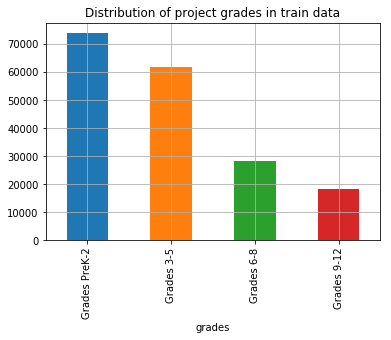

In [80]:
my_colors = 'rgbkymc'
df['project_grade_category'].value_counts().plot(kind='bar')
plt.xlabel('grades')
plt.ylabel('')
plt.title('Distribution of project grades in train data')
plt.grid()
plt.show()

In [13]:
#does approved projects depend on grades?
#lets try to see

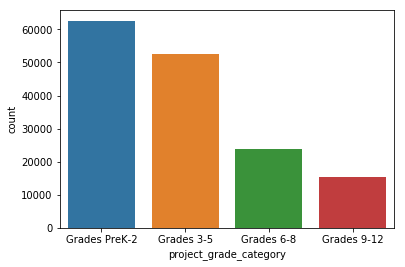

In [14]:
sns.countplot(x='project_grade_category',data=df[df['project_is_approved']==1])

plt.show()

In [15]:
# most approved projects grades are for gradesprek-2

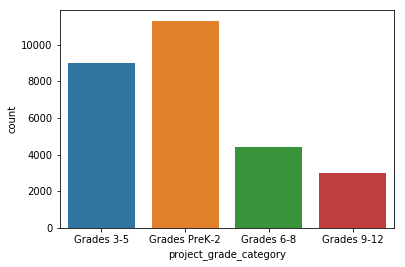

In [16]:
sns.countplot(x='project_grade_category',data=df[df['project_is_approved']==0])

plt.show()

In [17]:
# most approved projects grades are for gradesprek-2(small children) only and distribution is same only for both

In [18]:
##Does approved depends on gender/

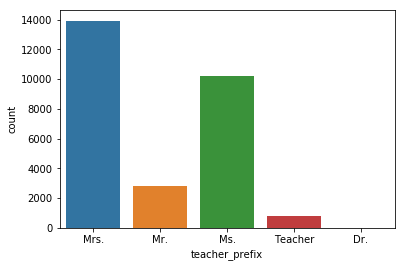

In [19]:
sns.countplot(x='teacher_prefix',data=df[df['project_is_approved']==0])
plt.show()

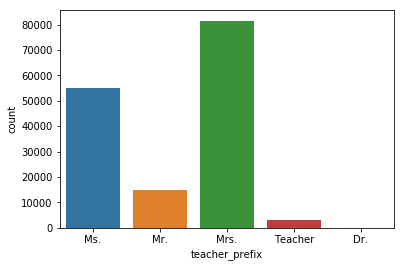

In [20]:
sns.countplot(x='teacher_prefix',data=df[df['project_is_approved']==1])
plt.show()

In [21]:
## Unsurprisingly, there are more Female teachers. But that does not affect/bias the Approval rate at all.

In [22]:
## Project Subject Category:

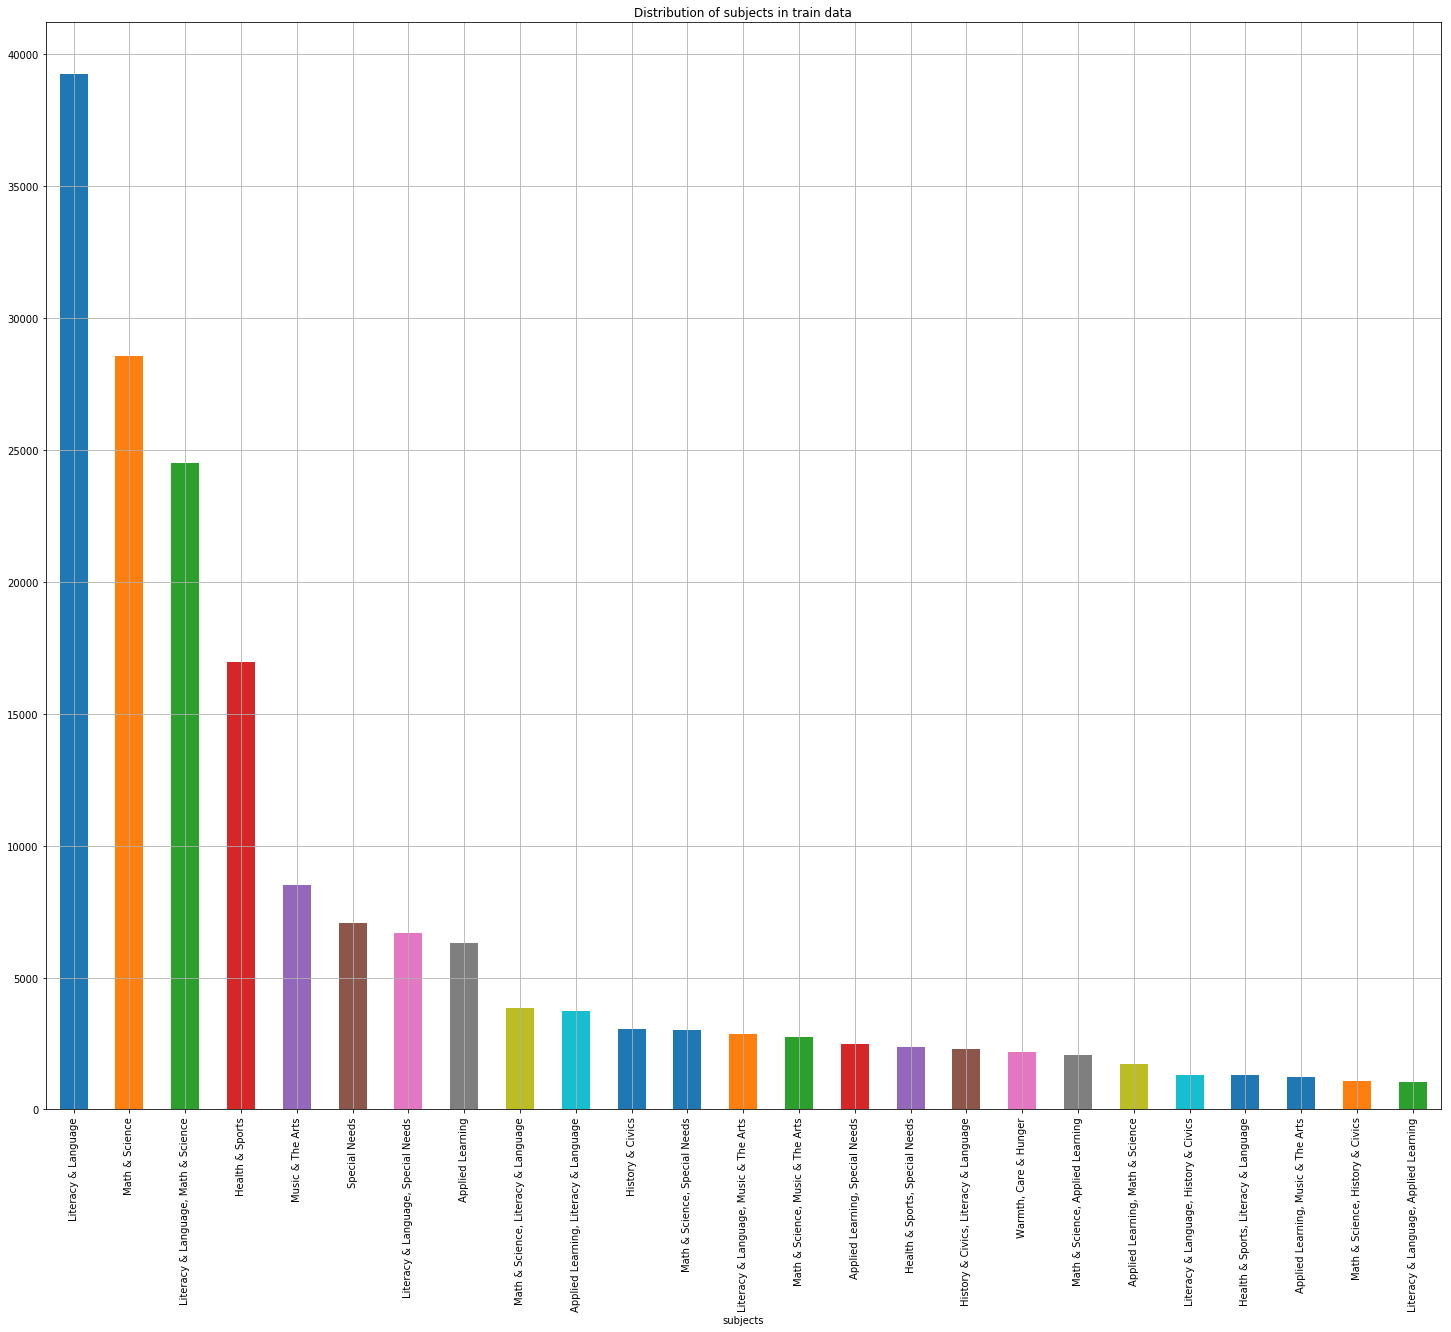

In [23]:

my_colors = 'rgbkymc'
plt.figure(figsize=(25,20))
df['project_subject_categories'].value_counts()[0:25].plot(kind='bar')

plt.xlabel('subjects')
plt.ylabel('')
plt.title('Distribution of subjects in train data')
plt.grid()
plt.show()

In [24]:
# literacy and language is the most 

In [25]:
#As seen  literacy and language us also present in the others which say that it may be cleaned,So when using Countvectorizer we 
#can use split by comma and binary=True 

In [28]:
##project subject subcategories

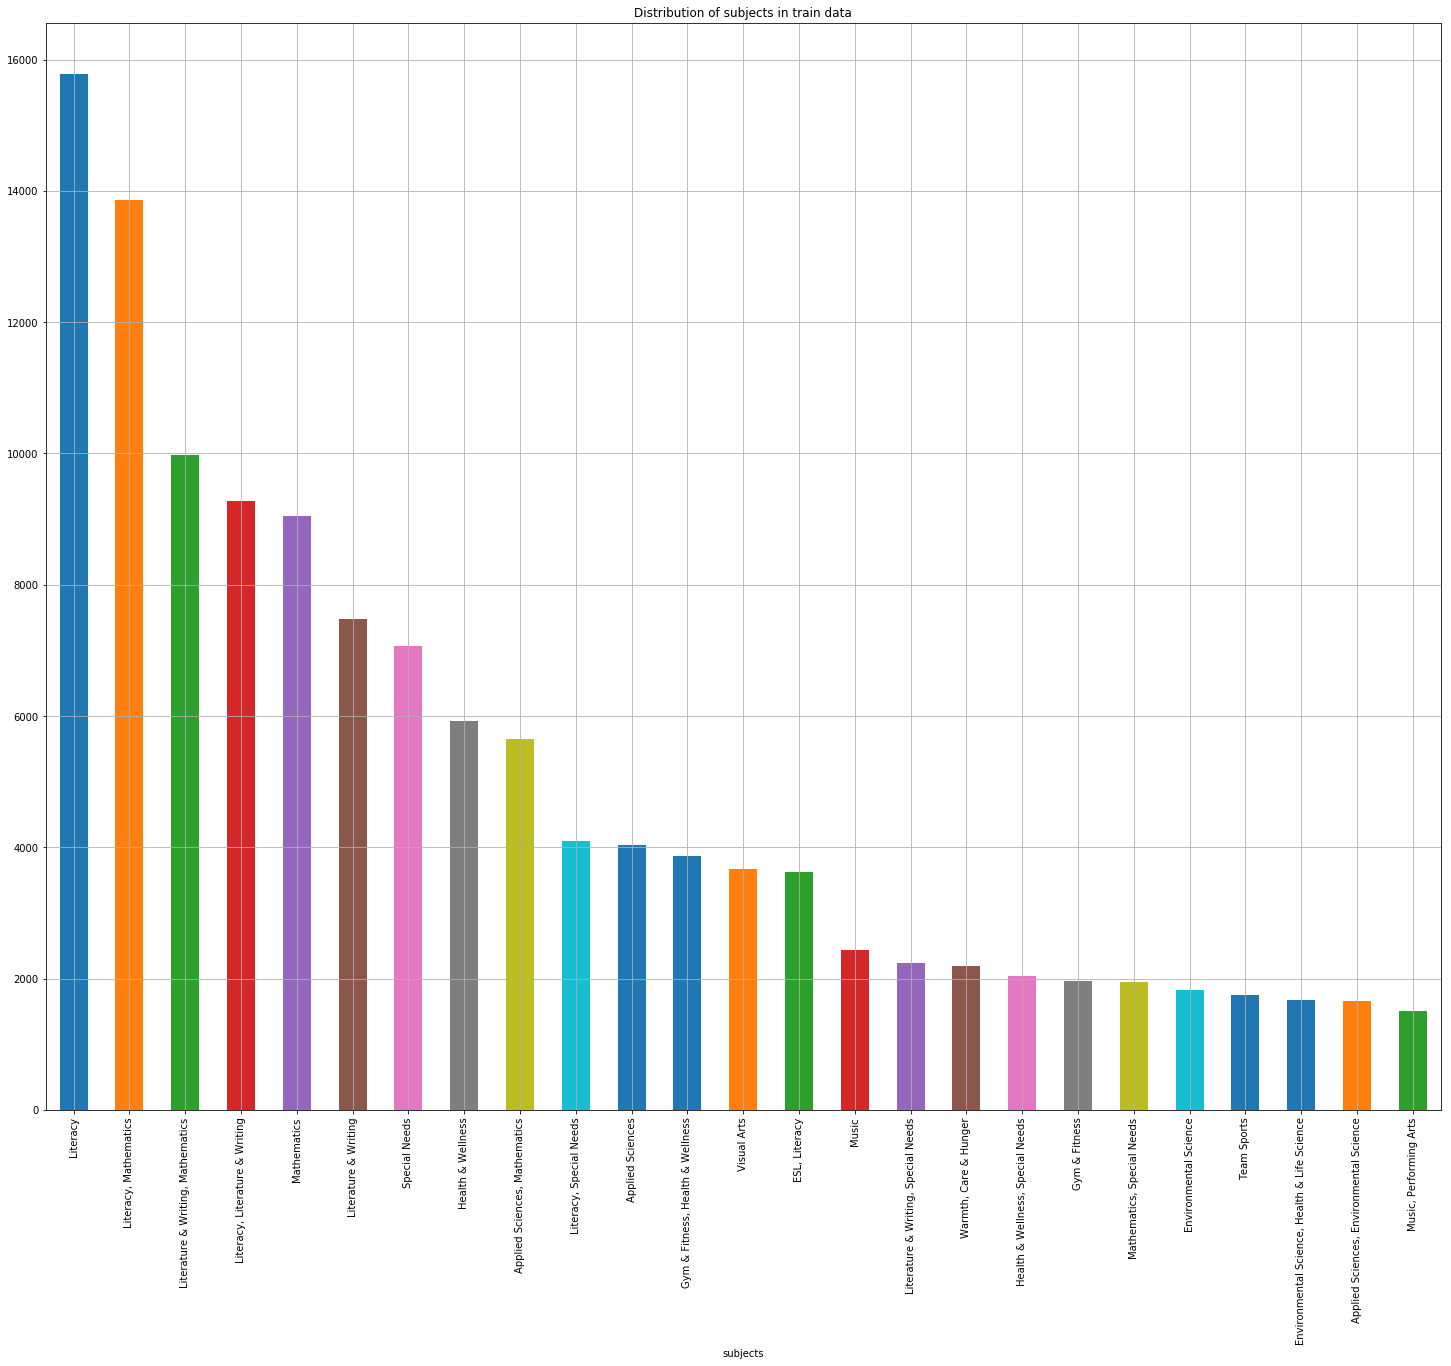

In [26]:
my_colors = 'rgbkymc'
plt.figure(figsize=(25,20))
df['project_subject_subcategories'].value_counts()[0:25].plot(kind='bar')

plt.xlabel('subjects')
plt.ylabel('')
plt.title('Distribution of subjects in train data')
plt.grid()
plt.show()

In [27]:
##Literacy is the most applied 

In [33]:
## Does approval depends on states/country?

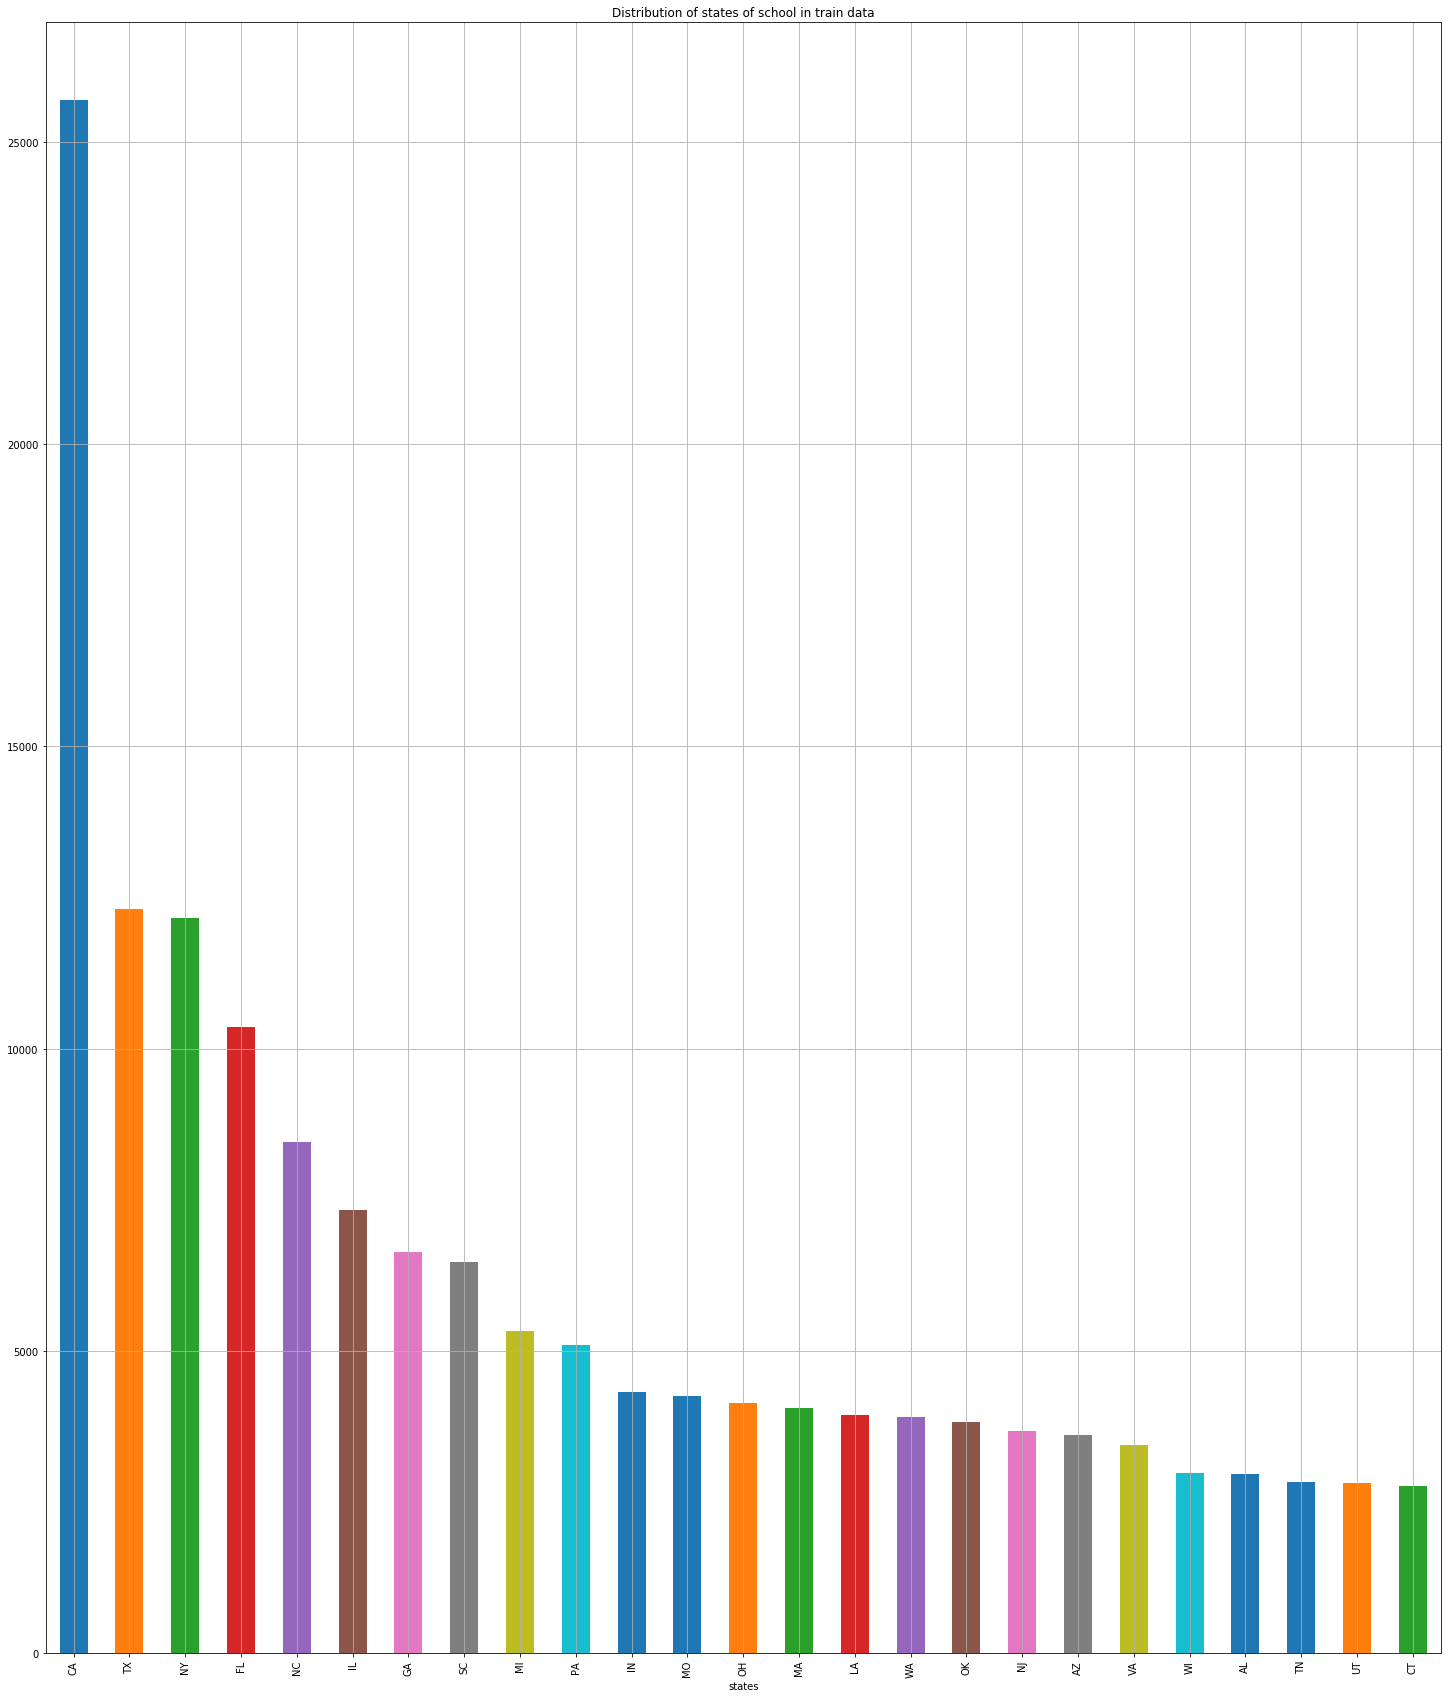

In [34]:
# school state
plt.figure(figsize=(25,30))
df['school_state'].value_counts()[0:25].plot(kind='bar')
plt.xlabel('states')
plt.title('Distribution of states of school in train data')
plt.grid()
plt.show()

In [35]:
##California has  mostly applied for projects , with Texas and NY in joint second place.

In [28]:
## can we represent this on US map to get a  clear sense
#Yes

In [29]:
##Correlation between different features

In [69]:
cols = ['teacher_prefix', 'project_is_approved']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[cols[0]], df[cols[1]]).style.background_gradient(cmap = cm)

project_is_approved,0,1
teacher_prefix,,
Dr.,5,21
Mr.,2791,14876
Mrs.,13921,81484
Ms.,10212,54854
Teacher,805,3107


In [71]:
cols = ['teacher_number_of_previously_posted_projects', 'project_is_approved']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[cols[0]], df[cols[1]]).style.background_gradient(cmap = cm)

project_is_approved,0,1
teacher_number_of_previously_posted_projects,,
0,9045,41022
1,4518,22213
2,2776,14461
3,1887,10006
4,1374,7421
5,1062,5871
6,807,4810
7,634,3855
8,553,3303


In [ ]:
#Number of previously posted applications by the submitting teacher was Zero(0) having more number of acceptance rate.

In [ ]:
##Time feature

In [81]:
df['project_submitted_datetime'].head()

0    2016-11-18 14:45:59
1    2017-04-26 15:57:28
2    2017-01-01 22:57:44
3    2016-08-12 15:42:11
4    2016-08-06 09:09:11
Name: project_submitted_datetime, dtype: object

In [ ]:
#Date and time are given
#We can extract various features like exact date,time,days(sunday etc).After this we can sort the data according time.
#It might prove to be useful at the later stages.

In [ ]:
#Distrinution according to months

In [30]:
# extracting datetime features using datetime module 
df["project_submitted_datetime"] = pd.to_datetime(df["project_submitted_datetime"])
df["Year"] = df["project_submitted_datetime"].dt.year
df["Month"] = df["project_submitted_datetime"].dt.month
df['Weekday'] = df['project_submitted_datetime'].dt.weekday
df["Hour"] = df["project_submitted_datetime"].dt.hour
df["Month_Day"] = df['project_submitted_datetime'].dt.day
df["Year_Day"] = df['project_submitted_datetime'].dt.dayofyear

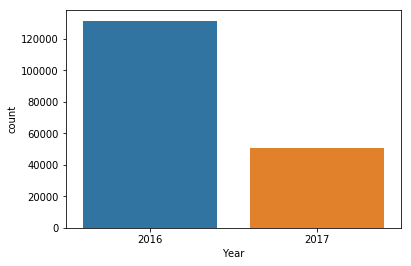

In [33]:
sns.countplot(x='Year',data=df)

In [ ]:
# majorly dates are for 2016 and 2017

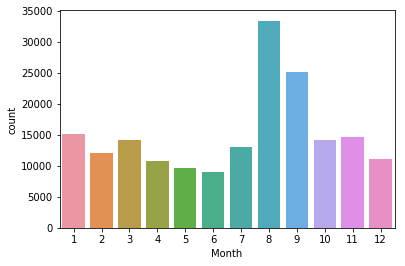

In [32]:
sns.countplot(x='Month',data=df)


In [34]:
#August has the highest no of requests

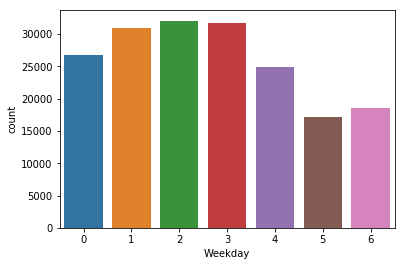

In [35]:
sns.countplot(x='Weekday',data=df)

In [36]:
##Wednesday has highest no of requests

In [37]:
df["Year_Day"][0:5]

0    323
1    116
2      1
3    225
4    219
Name: Year_Day, dtype: int64

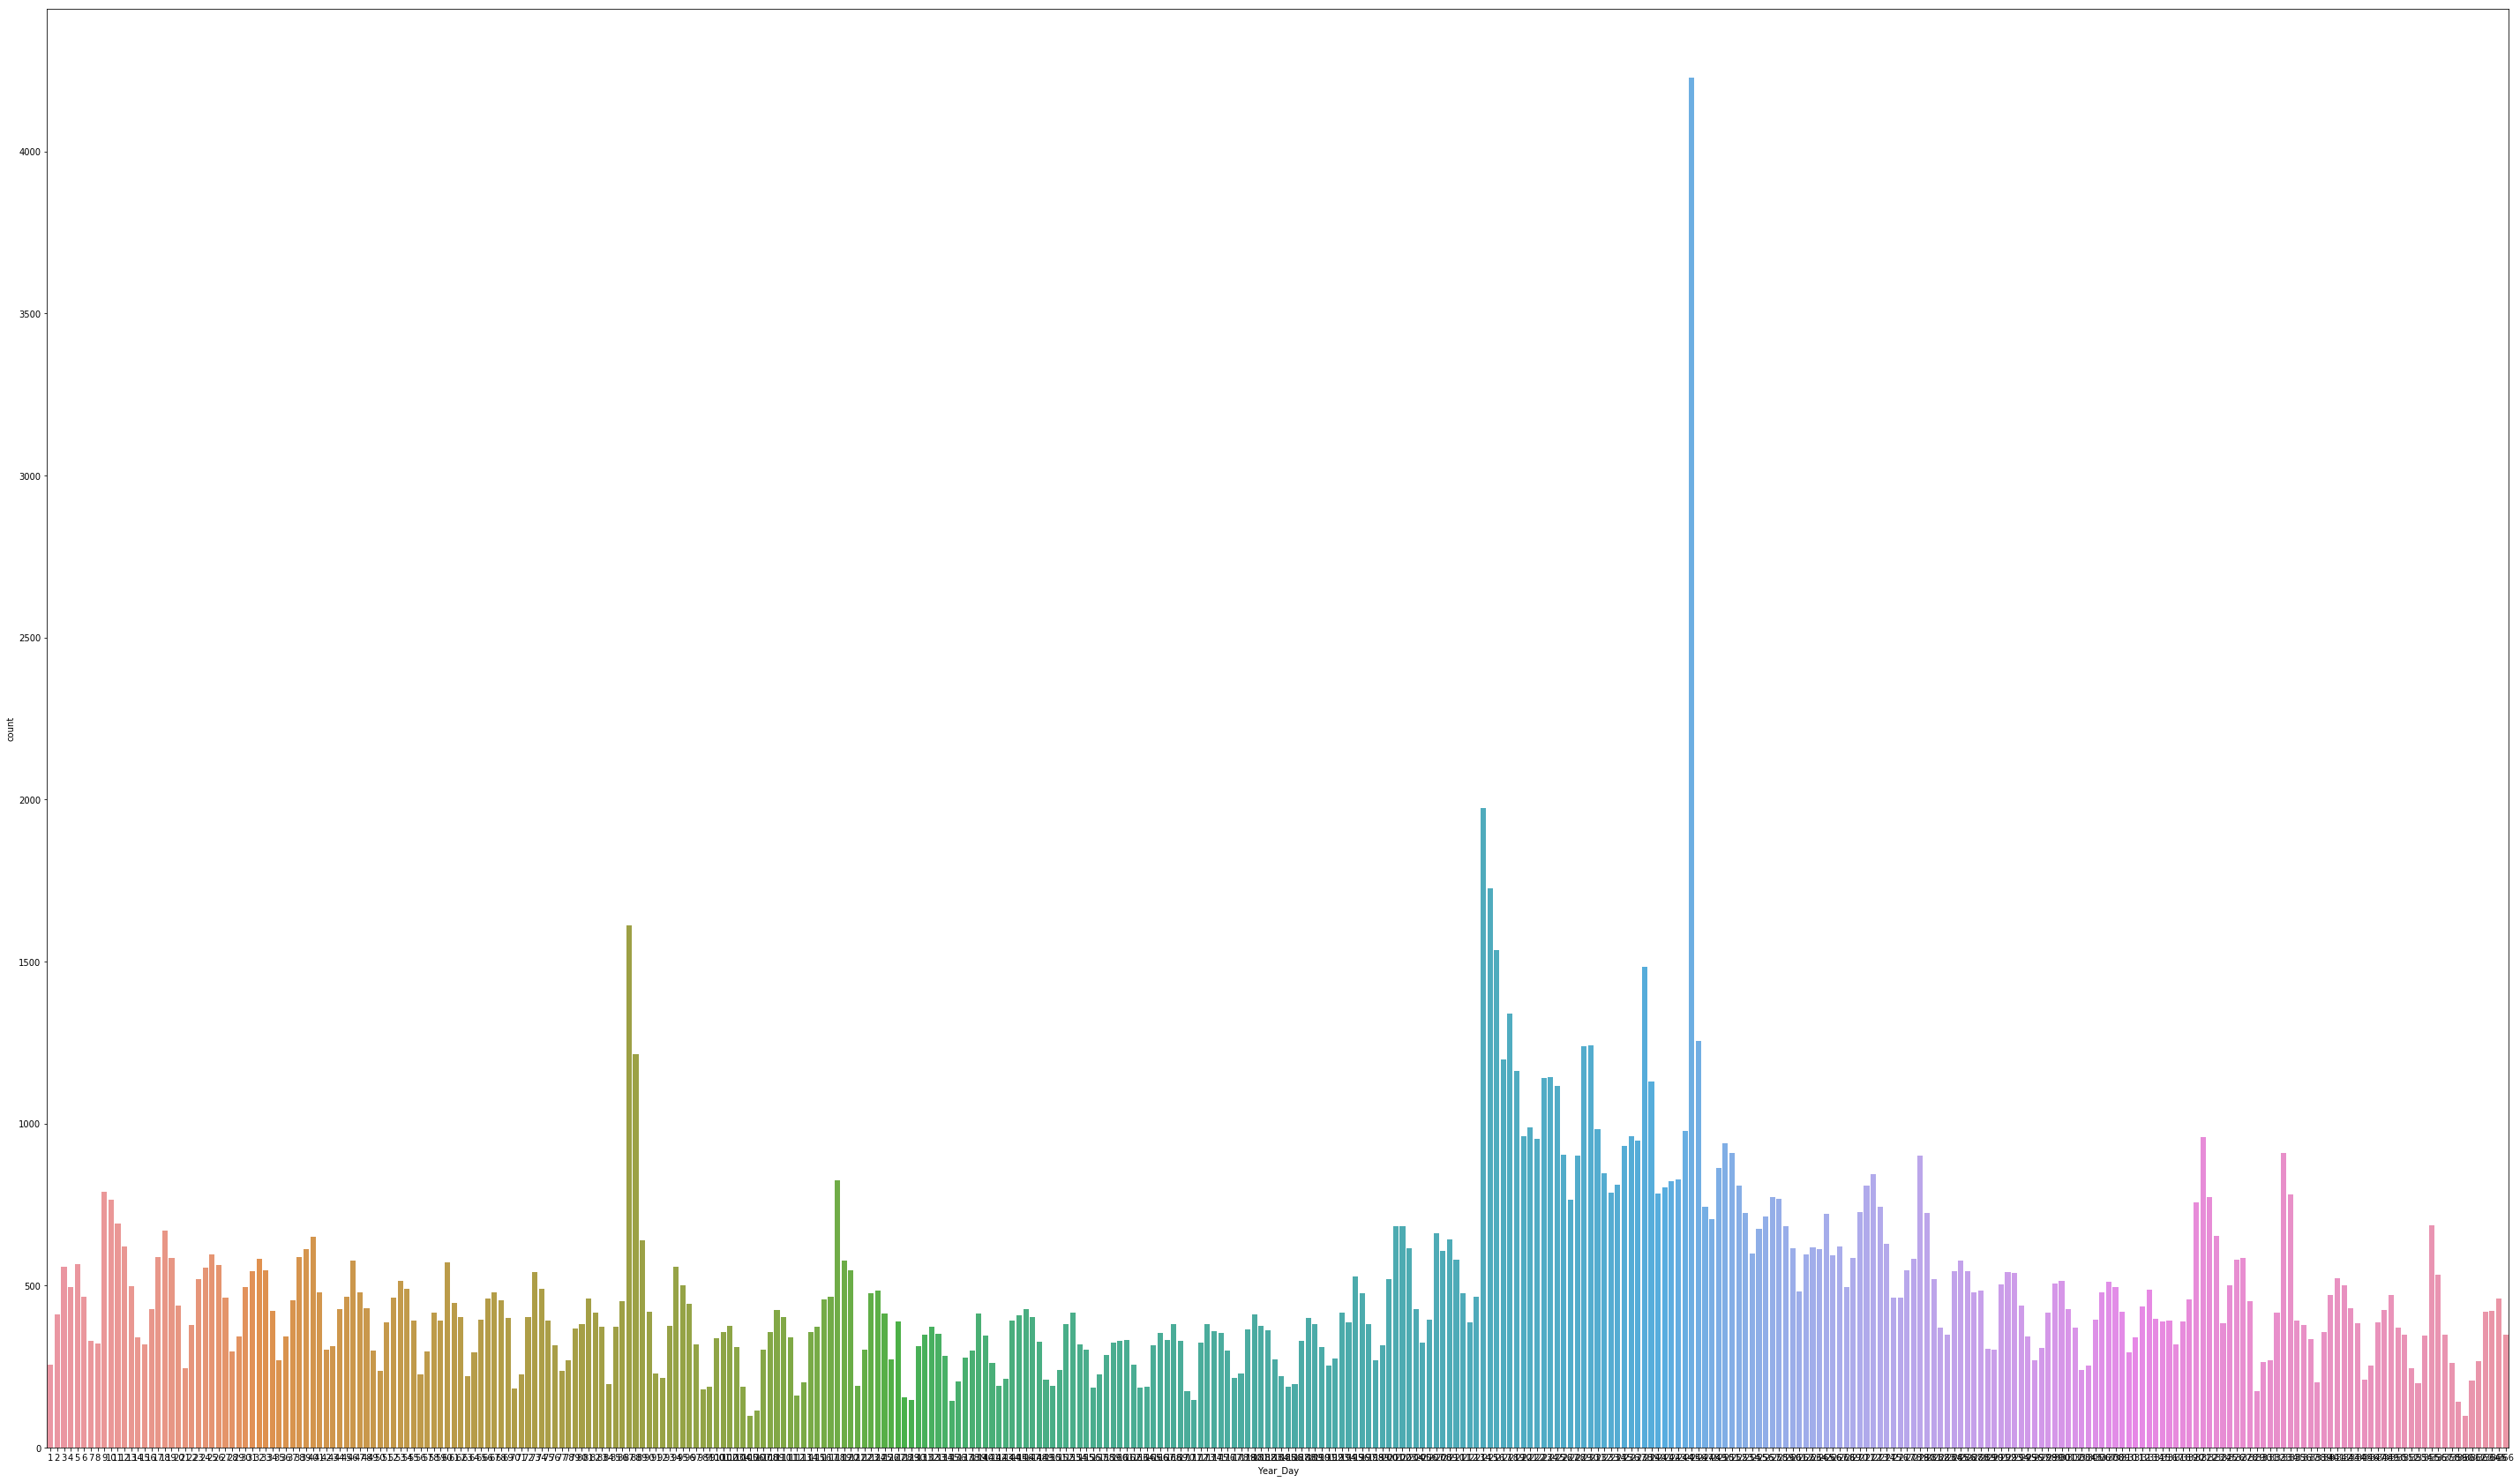

In [38]:
plt.figure(figsize=(50,30))
sns.countplot(x="Year_Day",data=df)

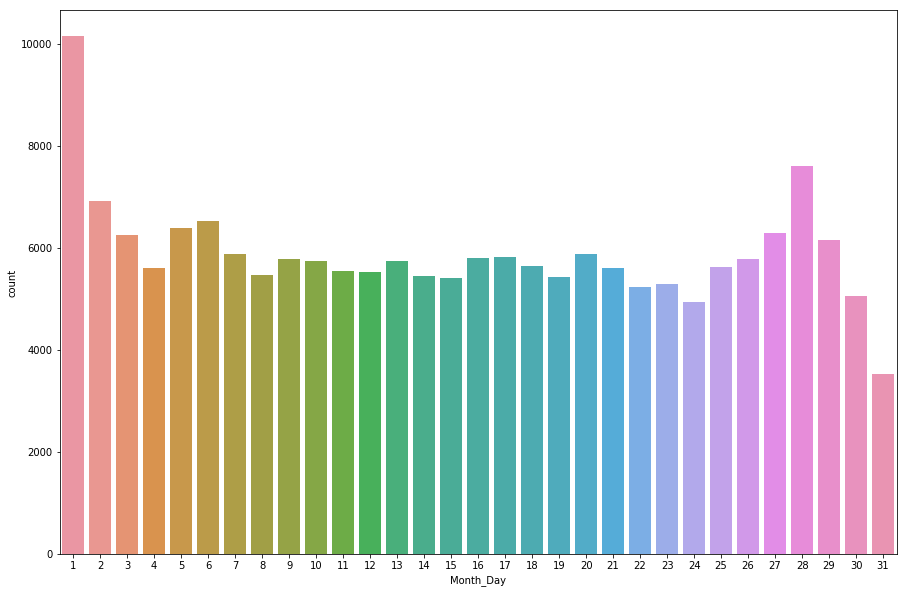

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x="Month_Day",data=df)

In [ ]:
##1st day of the month has more requests

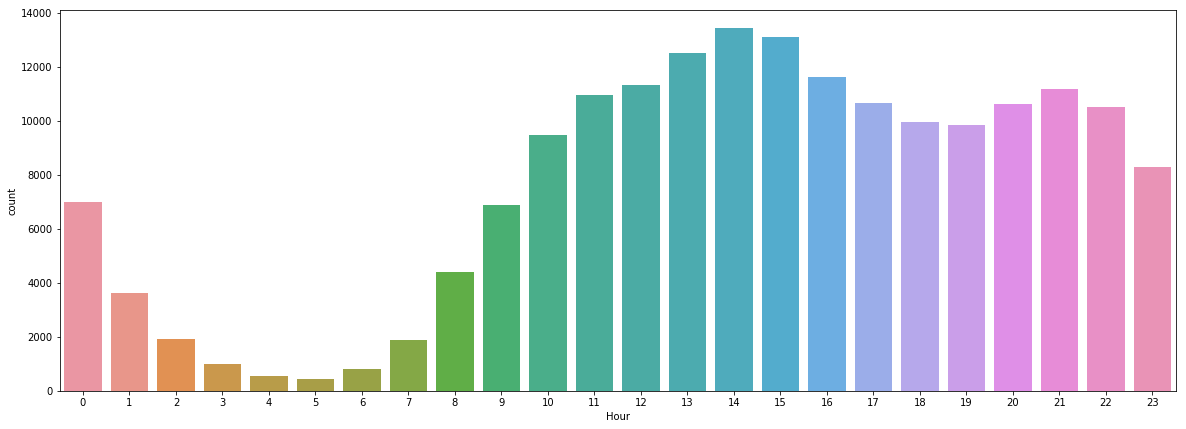

In [107]:
plt.figure(figsize=(20,7))
sns.countplot(x="Hour",data=df)

In [108]:
#At 14th hour of the day more requests have been made

In [109]:
#Are these features useful?We can do our analysis and if AUC>0.5 then they are useful towards final model

In [39]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day'],
      dtype='object')

In [41]:
df=df.sort_values(by=['project_submitted_datetime'])

In [46]:
Dateframe=df.drop(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],axis=1)

In [48]:
y=df['project_is_approved']

Datetrain=Dateframe.iloc[0:116532,:]
Datecvcv=Dateframe.iloc[116532:145664,:]
Datetest=Dateframe.iloc[145664:,:]


y_train=y[0:116532]
y_cv=y[116532:145664]
y_test=y[145664:]

In [54]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5,4)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(Datetrain, y_train)
    predict_y = clf.predict_proba(Datecvcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.4875786882206855
For values of alpha =  0.0001 The AUC is: 0.4877126646720637
For values of alpha =  0.001 The AUC is: 0.4877159861614708
For values of alpha =  0.01 The AUC is: 0.48771254812857573
For values of alpha =  0.1 The AUC is: 0.4877469673053561
For values of alpha =  1 The AUC is: 0.48809906460642644
For values of alpha =  10 The AUC is: 0.4886377868795653
For values of alpha =  100 The AUC is: 0.4878090072887852
For values of alpha =  1000 The AUC is: 0.48873044866445825


In [55]:
clf =LogisticRegression(C=100, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(Datetrain, y_train)

predict_y = clf.predict_proba(Datetrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Datecvcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Datetest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.5120226761342461
For values of best alpha =  The cv AUC is: 0.4878090072887852
For values of best alpha =  The test AUC is: 0.503678382325802


In [ ]:
##I donot think think the features are more useful
#Should we keep in the final model?

In [ ]:
#Resouce features


In [56]:
rc.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [ ]:
##below are 4 methods of histograms....please see and tell...i am confused

(array([2.6825e+04, 3.5000e+01, 1.0000e+01, 7.0000e+00, 5.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 2.98990e+03, 5.97880e+03, 8.96770e+03, 1.19566e+04,
        1.49455e+04, 1.79344e+04, 2.09233e+04, 2.39122e+04, 2.69011e+04,
        2.98900e+04]),
 <a list of 10 Patch objects>)

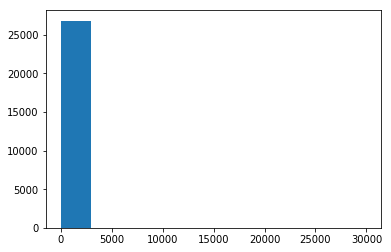

In [205]:
plt.hist(rc['price'].value_counts())
##if normed=True whats the difference

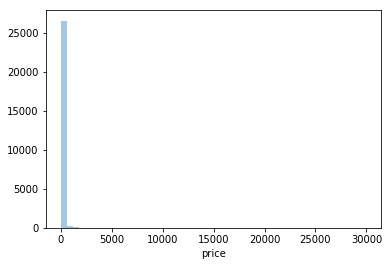

In [204]:
x=rc['price'].value_counts().sortlevel()
sns.distplot(x,kde=False)

In [ ]:
## most of the prices list fall between 

In [188]:
rc['price'].value_counts().values

array([29890, 24729, 21408, ...,     1,     1,     1], dtype=int64)

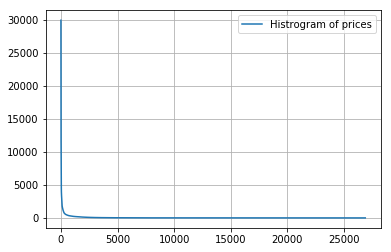

In [206]:
#s = sum(rc['price'].value_counts());
h = (rc['price'].value_counts().values); ## dont understand this line
plt.plot(h, label="Histrogram of prices")
plt.legend()
plt.grid()
plt.show()

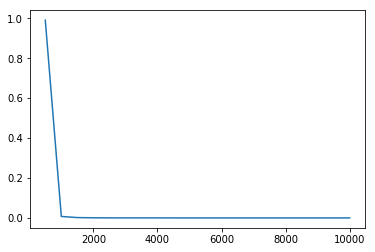

In [164]:
counts, bin_edges = np.histogram(rc['price'], bins=20, 
                                 density = True)

pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


In [57]:
## I could not understand what they have done here,but many notebook used it..so pls make it clear!

In [58]:
rc['total_price'] = rc['quantity']*rc['price']
agg_rc = rc.groupby('id').agg({'description':'count', 'quantity':'sum', 'price':'sum', 'total_price':'sum'}).rename(columns={'description':'items'})

for func in ['min', 'max', 'mean']:
    agg_rc_temp = rc.groupby('id').agg({'quantity':func, 'price':func, 'total_price':func}).rename(columns={'quantity':func+'_quantity', 'price':func+'_price', 'total_price':func+'_total_price'}).fillna(0)
    agg_rc = agg_rc.join(agg_rc_temp)

agg_rc = agg_rc.join(rc.groupby('id').agg({'description':lambda x:' '.join(x.values.astype(str))}).rename(columns={'description':'resource_description'}))

df = df.join(agg_rc, on='id')


In [557]:
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,min_quantity,min_price,min_total_price,max_quantity,max_price,max_total_price,mean_quantity,mean_price,mean_total_price,resource_description
128730,p146022,f91a89d2b72a0f5ee14cd98bd8741fc2,Ms.,CA,2016-04-27 00:03:38,Grades 6-8,Math & Science,Applied Sciences,Robotics and Programming,I love giving my students experiences. A new e...,...,4,149.00,596.00,4,149.00,596.00,4.000000,149.000000,596.000000,ArcBotics Sparki the Easy Arduino Programmable...
173035,p244738,64ef8a335f7206366c52c39f5bfd09b7,Ms.,TX,2016-04-27 00:04:09,Grades PreK-2,"Literacy & Language, Math & Science","Foreign Languages, Mathematics",Help Us Finish Our 1st Year In School!,"We are getting closer to the end of the year, ...",...,1,9.99,9.99,1,49.99,49.99,1.000000,28.786000,28.786000,GA920 - Ten-Frames Class Set HH318 - Followin...
7344,p070708,1f802ff6be7973fb3624332e10549ed4,Mrs.,CA,2016-04-27 00:15:39,Grades PreK-2,Math & Science,Mathematics,Common Core Math Tools for Young Minds,"Our classroom is an engaging, vibrant, and div...",...,1,8.99,19.99,6,49.99,179.94,2.857143,27.704286,75.257143,BX700X - Heavy-Duty Classroom Bins - Set of 6 ...
180523,p083729,f72fac3c6011b17ad5b2037dfd18cd0b,Teacher,CA,2016-04-27 00:20:33,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Bring 21st Century Resources Into Kindergarten!,My students are young children eager to engage...,...,2,12.45,24.90,2,243.95,487.90,2.000000,128.200000,256.400000,Apple iPad mini 2 with Retina Display 2048 x 1...
8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,...,1,59.99,59.99,1,377.06,377.06,1.000000,181.262500,181.262500,BT363 - Bee-Bot&#174; Programmable Robot KT808...


In [558]:
df['resource_description'][0]

'Apple - iPod nano� 16GB MP3 Player (8th Generation - Latest Model) - Blue Apple - iPod nano� 16GB MP3 Player (8th Generation - Latest Model) - Silver'

In [ ]:
#Are these useful? Lets apply Logistic and see

In [59]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day', 'items',
       'quantity', 'price', 'total_price', 'min_quantity', 'min_price',
       'min_total_price', 'max_quantity', 'max_price', 'max_total_price',
       'mean_quantity', 'mean_price', 'mean_total_price',
       'resource_description'],
      dtype='object')

In [60]:
Resourceframe=df.drop(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved','Year', 'Month', 'Weekday', 'Hour', 'Month_Day',
                       'Year_Day','resource_description'],axis=1)

In [61]:
y=df['project_is_approved']

Restrain=Resourceframe.iloc[0:116532,:]
Rescv=Resourceframe.iloc[116532:145664,:]
Restest=Resourceframe.iloc[145664:,:]


y_train=y[0:116532]
y_cv=y[116532:145664]
y_test=y[145664:]

In [62]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5,4)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(Restrain, y_train)
    predict_y = clf.predict_proba(Rescv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.6534433123151038
For values of alpha =  0.0001 The AUC is: 0.6532352530532064
For values of alpha =  0.001 The AUC is: 0.6525221525861933
For values of alpha =  0.01 The AUC is: 0.6523872729227833
For values of alpha =  0.1 The AUC is: 0.6523049640844047
For values of alpha =  1 The AUC is: 0.6523081593183666
For values of alpha =  10 The AUC is: 0.6523057410409914
For values of alpha =  100 The AUC is: 0.6523357946929513
For values of alpha =  1000 The AUC is: 0.6523430835169282


In [63]:
clf =LogisticRegression(C=1000, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(Restrain, y_train)

predict_y = clf.predict_proba(Restrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Rescv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Restest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.6667346316491177
For values of best alpha =  The cv AUC is: 0.6523430835169282
For values of best alpha =  The test AUC is: 0.6632306111751424


In [64]:
##These features are totally useful and should be kept in the final model

In [65]:
#Categorical features feature extraction

In [66]:
#Using only one hot encoding till now
#not using mean coding

In [69]:
y=df['project_is_approved']
Xtrain=df.iloc[0:116532,:]
Xcv=df.iloc[116532:145664,:]
Xtest=df.iloc[145664:,:]


y_train=y[0:116532]
y_cv=y[116532:145664]
y_test=y[145664:]

In [70]:
def getCatFeatures(df, Col):
    vectorizer = CountVectorizer(binary=True,
                                 ngram_range=(1,1),
                                 tokenizer=lambda x:[a.strip() for a in x.split(',')]) #why strip() is imp here?
    vectorizer.fit(Xtrain[Col].fillna(''))
    return vectorizer.transform(df[Col].fillna(''))

In [71]:
X_tp = getCatFeatures(Xtrain, 'teacher_prefix')
X_ss = getCatFeatures(Xtrain, 'school_state')
X_pgc = getCatFeatures(Xtrain, 'project_grade_category')
X_psc = getCatFeatures(Xtrain, 'project_subject_categories')
X_pssc = getCatFeatures(Xtrain, 'project_subject_subcategories')

cattrain = hstack((X_tp, X_ss, X_pgc, X_psc, X_pssc))


In [72]:
X_tp = getCatFeatures(Xcv, 'teacher_prefix')
X_ss = getCatFeatures(Xcv, 'school_state')
X_pgc = getCatFeatures(Xcv, 'project_grade_category')
X_psc = getCatFeatures(Xcv, 'project_subject_categories')
X_pssc = getCatFeatures(Xcv, 'project_subject_subcategories')

catcv = hstack((X_tp, X_ss, X_pgc, X_psc, X_pssc))


In [73]:
X_tp = getCatFeatures(Xtest, 'teacher_prefix')
X_ss = getCatFeatures(Xtest, 'school_state')
X_pgc = getCatFeatures(Xtest, 'project_grade_category')
X_psc = getCatFeatures(Xtest, 'project_subject_categories')
X_pssc = getCatFeatures(Xtest, 'project_subject_subcategories')

cattest = hstack((X_tp, X_ss, X_pgc, X_psc, X_pssc))


In [74]:
cattrain.shape##100 featues 

(116532, 100)

In [75]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5,4)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(cattrain, y_train)
    predict_y = clf.predict_proba(catcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.5532991587036387
For values of alpha =  0.0001 The AUC is: 0.5561695471166674
For values of alpha =  0.001 The AUC is: 0.5609991481059508
For values of alpha =  0.01 The AUC is: 0.5601621521992688
For values of alpha =  0.1 The AUC is: 0.5587336883791846
For values of alpha =  1 The AUC is: 0.5583345366448467
For values of alpha =  10 The AUC is: 0.5582882591681655
For values of alpha =  100 The AUC is: 0.5582874045159203
For values of alpha =  1000 The AUC is: 0.5582872297006882


In [77]:
clf =LogisticRegression(C=0.1, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(cattrain, y_train)

predict_y = clf.predict_proba(cattrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(catcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(cattest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.5703088598541463
For values of best alpha =  The cv AUC is: 0.5587336883791846
For values of best alpha =  The test AUC is: 0.575804082835569


In [78]:
###Definitely categorical features needs to be added

In [79]:
#Id and teacherID--can we extract something meaningful?
#no of previously applied feature is correlated with y,we can directly use this feature

In [80]:
df['id'][0:5]

128730    p146022
173035    p244738
7344      p070708
180523    p083729
8393      p205479
Name: id, dtype: object

In [81]:
df['teacher_id'][0:5]

128730    f91a89d2b72a0f5ee14cd98bd8741fc2
173035    64ef8a335f7206366c52c39f5bfd09b7
7344      1f802ff6be7973fb3624332e10549ed4
180523    f72fac3c6011b17ad5b2037dfd18cd0b
8393      2bf07ba08945e5d8b2a3f269b2b3cfe5
Name: teacher_id, dtype: object

In [ ]:
df['teacher_id']=le.fit_transform(df['id'])

In [566]:
x=np.array(df['teacher_id'])
y=np.array(df['id'])

In [ ]:
le = LabelEncoder()
le.fit(Xtrain['teacher_id'])
idtrain=le.transform(Xtrain['teacher_id'])
idcv=le.transform(Xcv['teacher_id'])
idtest=le.transform(Xtest['teacher_id'])


In [ ]:
##Label encoder is not helping

In [90]:
##Text feature
# shifting 2nd essay text to 4th essay if that is empty
#then combining 1st and 2nd ,3rd and 4th essays

In [91]:
# 
df.loc[df['project_essay_4'].isnull(),['project_essay_2','project_essay_4']] =df.loc[df['project_essay_4'].isnull(),['project_essay_4','project_essay_2']].values

In [92]:
df['project_essay_2'][0:2]

128730    My students can vary quite dramatically. I hav...
173035    Welcome to our Pre-K classroom. We work hard e...
Name: project_essay_2, dtype: object

In [93]:
df[['project_essay_2','project_essay_3']] = df[['project_essay_2','project_essay_3']].fillna('')
df['project_essay_1'] = df.apply(lambda row: ' '.join([str(row['project_essay_1']), 
                                                     str(row['project_essay_2'])]), axis=1)
df['project_essay_2'] = df.apply(lambda row: ' '.join([str(row['project_essay_3']),
                                                     str(row['project_essay_4'])]), axis=1)

df = df.drop(['project_essay_3', 'project_essay_4'], axis=1)


In [94]:
df['project_essay_1'].values[2]

'Our classroom is an engaging, vibrant, and diverse community that strives to create an inclusive learning environment for all students! It\'s a bright and busy place with high learning expectations, technology, and Common Core Math/English Language Arts and the center of it all! My students are learning to become strong, independent, critical thinkers while also transitioning into responsible and respectful members of our community. The students in my classroom are young but with structure, guidance, engaging lessons, and hands-on activities anything is possible! My students are at the beginning of their educational careers and it is my goal to provide them with  positive opportunities and experiences with core content areas such as Math, Reading, Science, Social Studies, and Technology in order to foster a curiosity and love of learning! \\r\\n\\r\\nThe school community we are part of is an \\"Inclusion Community\\" that provides the least restrictive environment for all students and

In [95]:
##\\r\\n\\r\\n---so preprocessing must be done on the text 

In [96]:
df['project_essay_2'].values[1]

"This time, I am asking to improve three different centers. My students are bilingual and it is very difficult to find appropriate Spanish books for emergent readers. I am sure my students, who are ready to read, will benefit from these books. I will work in small group to help them improve their reading skills. Also, the Monkey Letters are to spell out sight words and even for them to create words on their own. My other two centers are math and construction. Math can be integrated in construction to make it more education for the students, but at the same time they are learning and enjoying it. Building by following instructions is favorable for young children to learn to how to listen. Soft Blocks are perfect for preschoolers; these block are safe and colorful to catch their attention. The Ten Frame class set will be perfect to work with addition and counting. Everything will be used for the development of my students' education and to be ready for Kindergarten. This project will hav

In [97]:
##Speling mistakes are there---(environment)
# It will be good to have a feature of no of spelling mistakes
# Also we should correct the mistakes to make our analysis better

In [98]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from autocorrect import spell
spell('TGhe')

'The'

In [99]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", 
                    "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                    "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", 
                    "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have",
                    "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                    "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                    "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                    "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not",
                    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                    "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                    "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have",
                    "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                    "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                    "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
                    "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
                    "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", 
                    "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
                    "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                    "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                    "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                    "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have",
                    "y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)



In [100]:
df['resource_description']=df['resource_description'].astype(str)
stop=set(stopwords.words('english'))

In [101]:
def clean_text(text):
    tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha() ]
    return words

In [102]:
#lowering
def preprocess(df):
    df=df.apply(lambda x:clean_text(x)) # removing punctuations
    df=df.apply(lambda x:" ".join(word.lower() for word in x if word not in stop))
    df = df.apply(lambda x: replace_contractions(x))
    #df['text1']=df['text1'].apply(lambda x: str(TextBlob(x).correct()))  ## taking a lot of time
    #df=df.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    return df

In [103]:
df['text0']=preprocess(df['project_essay_1'])

In [104]:
df['project_essay_1'][3]

'My students are the greatest students but are socially and economically disadvantaged.  We are an inner city school being limited to doing all activities in (PE) Physical Education inside because we have violence at the location where our school is located.  All the physical activities the students are active with are within the school so we have to have a good program.\\r\\n\\r\\nMost of the students are either African American or Hispanic.  The students range from being enrolled as a kindergarten-8th grade.  Since Physical Education is important with one\'s success in school; all the students have PE class Monday through Friday every day.  The proper equipment in PE is not always possible so this is why we are here asking for your help with shelving.\\r\\n\\r\\nThis project is \\"kid-inspired\\" in that they want better fitness.  They look back at their PE class and said that is only 30 minutes each day.  They go to an extended day school year-round school which after 3:00 in the af

In [105]:
df['text0'][3] ##preprocessed text

'my students greatest students socially economically disadvantaged we inner city school limited activities pe physical education inside violence location school located all physical activities students active within school good students either african american hispanic the students range enrolled grade since physical education important one success school students pe class monday friday every day the proper equipment pe always possible asking help project want better fitness they look back pe class said minutes day they go extended day school school afternoon minutes physical activity they said need equipment active the students kid want variety equipment life changing physical activity'

In [106]:
df['text1']=preprocess(df['project_essay_2'])
df['text2']=preprocess(df['project_resource_summary'])
df['text3']=preprocess(df['project_title'])
df['text4']=preprocess(df['resource_description'])

In [107]:
## lets see some wordcloud for the rejected and accepted essays

In [108]:
x=df[df['project_is_approved']==1]
y=df[df['project_is_approved']==0]

In [109]:
x['text0'][0]

'most kindergarten students come households considered these kids walk school alongside parents never walking distance house for students english first language language spoken home kindergarten kids many obstacles front come school day excited ready learn most students started year never school setting at start year many never exposed letters each day soak knowledge try hardest succeed they highly motivated learn new things every day we halfway year starting take they know know letters sight words numbers majority letter sounds hard work determination i excited see places go'

In [110]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


def wordcloud(text,heading):
    text =str(text)
# Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
    fig = plt.figure(figsize=(10,10))
    
    plt.xlabel(heading)
    plt.imshow(wordcloud, interpolation='bilinear')
    
    plt.show()

   

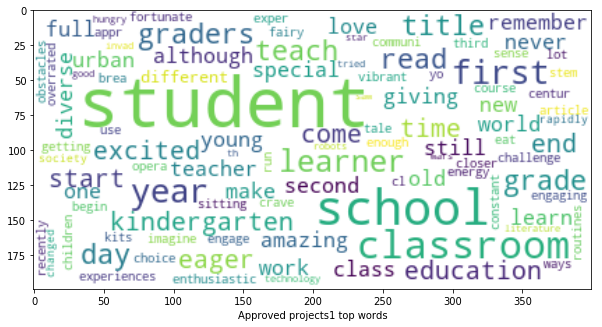

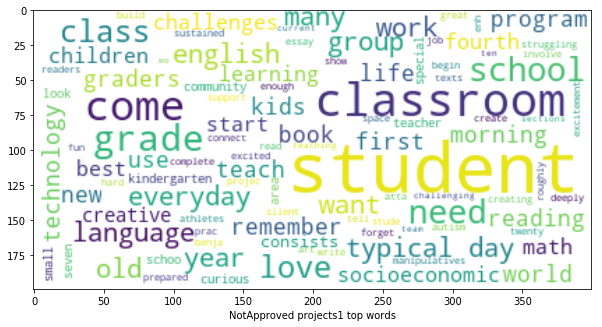

In [111]:
wordcloud(x['text0'],'Approved projects1 top words')
wordcloud(y['text0'],'NotApproved projects1 top words')

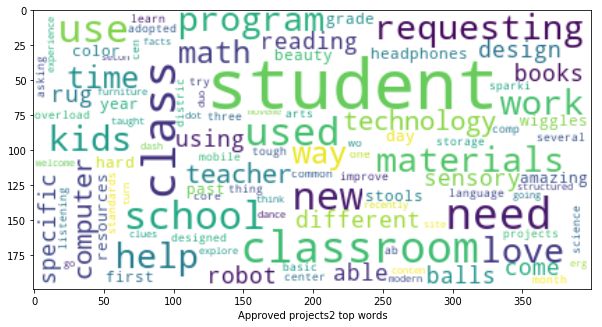

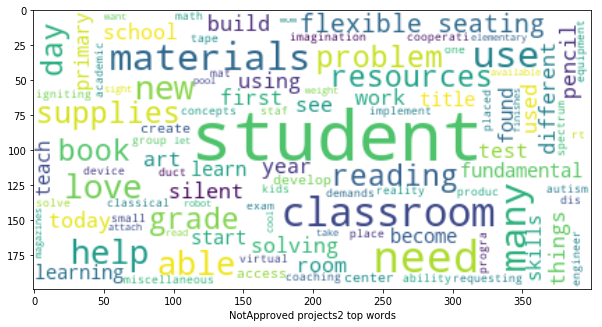

In [112]:
wordcloud(x['text1'],'Approved projects2 top words')
wordcloud(y['text1'],'NotApproved projects2 top words')

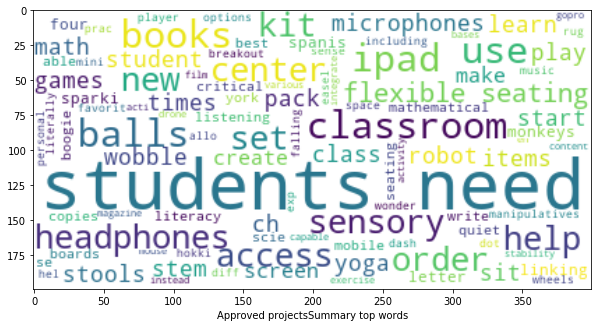

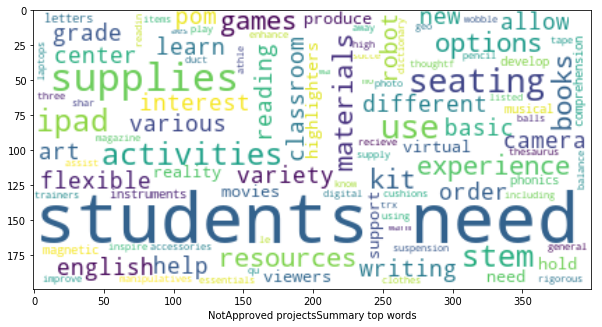

In [113]:
wordcloud(x['text2'],'Approved projectsSummary top words')
wordcloud(y['text2'],'NotApproved projectsSummary top words')

In [114]:
##We conclude there is not much we can understand which words are given importances
## Still Tfidf will be much better for this text data


In [115]:
#Rather than combining all the text it will be much better to take different texts and generate Vectors and then combine each
#of them

In [122]:
dfnew=df.sort_values(by=['project_submitted_datetime'])

In [123]:
df.shape

(182080, 39)

In [124]:
Xtrain=dfnew.iloc[0:116532,:]
Xcv=dfnew.iloc[116532:145664,:]
Xtest=dfnew.iloc[145664:,:]

In [125]:
Xtest.shape

(36416, 39)

In [119]:
def getTextFeatures(df, Col,ngrams=(1,2),max_features=10000, verbose=True):


    vectorizer = TfidfVectorizer(min_df=3, max_features=max_features)
    vectorizer.fit(Xtrain[Col])
    X=vectorizer.transform(df[Col])
    return X, vectorizer.get_feature_names()

In [340]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xtrain, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtrain, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtrain, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtrain, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xtrain, 'text3', max_features=n_pt)

Xtexttrain = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [348]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xcv, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xcv, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xcv, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xcv, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xcv, 'text3', max_features=n_pt)

Xtextcv = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [349]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xtest, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtest, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtest, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtest, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xtest, 'text3', max_features=n_pt)

Xtexttest = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [360]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(Xtexttrain, y_train)
    predict_y = clf.predict_proba(Xtextcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.6760248610957015
For values of alpha =  0.0001 The AUC is: 0.6784257152196161
For values of alpha =  0.001 The AUC is: 0.6964399198507125
For values of alpha =  0.01 The AUC is: 0.7402448390270265
For values of alpha =  0.1 The AUC is: 0.7561560746894582
For values of alpha =  1 The AUC is: 0.735003363639302


In [359]:
clf =LogisticRegression(C=0.1, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(Xtexttrain, y_train)

predict_y = clf.predict_proba(Xtexttrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtextcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtexttest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.842325061089084
For values of best alpha =  The cv AUC is: 0.7561560746894582
For values of best alpha =  The test AUC is: 0.7614843156173567


In [ ]:
## It proves different fittings of columns is giving better results rather than taking whole of the text at a time
#By taking whole  text at  a time gave me an AUC of 0.73
#Lets try Countvectorizer

In [ ]:
#count vectorizer

In [120]:
def getTextFeatures(df, Col,ngrams=(1,2),max_features=10000, verbose=True):


    vectorizer =CountVectorizer(min_df=3, max_features=max_features)
    vectorizer.fit(Xtrain[Col])
    X=vectorizer.transform(df[Col])
    return X, vectorizer.get_feature_names()

In [126]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xtrain, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtrain, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtrain, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtrain, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xtrain, 'text3', max_features=n_pt)

Xtexttrain = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [127]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xcv, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xcv, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xcv, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xcv, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xcv, 'text3', max_features=n_pt)

Xtextcv = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [128]:
n_es1, n_es2, n_prs, n_rd, n_pt = 8000, 8000, 2000, 3000, 1000
X_es1, feat_es1 = getTextFeatures(Xtest, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtest, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtest, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtest, 'text4', max_features=n_rd, ngrams=(1,3))
X_pt, feat_pt = getTextFeatures(Xtest, 'text3', max_features=n_pt)

Xtexttest = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [129]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(Xtexttrain, y_train)
    predict_y = clf.predict_proba(Xtextcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.7069773449948301
For values of alpha =  0.0001 The AUC is: 0.7397262982012212
For values of alpha =  0.001 The AUC is: 0.7589514576560215
For values of alpha =  0.01 The AUC is: 0.7472100120257341
For values of alpha =  0.1 The AUC is: 0.7137066728217166
For values of alpha =  1 The AUC is: 0.6833108880287461


In [131]:
clf =LogisticRegression(C=0.001, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(Xtexttrain, y_train)

predict_y = clf.predict_proba(Xtexttrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtextcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtexttest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.8075815724986446
For values of best alpha =  The cv AUC is: 0.7589514576560215
For values of best alpha =  The test AUC is: 0.7661871409803753


In [130]:
##Countvectorizer is giving slightly  better results than TFIDF.

In [392]:
def getTextFeatures(df, Col,ngrams=(1,3),max_features=10000, verbose=True):

#
    vectorizer =TfidfVectorizer(min_df=3, max_features=max_features)
    vectorizer.fit(Xtrain[Col])
    X=vectorizer.transform(df[Col])
    return X, vectorizer.get_feature_names()

In [393]:
n_es1, n_es2, n_prs, n_rd, n_pt = 10000, 10000, 5000, 5000, 1000
X_es1, feat_es1 = getTextFeatures(Xtrain, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtrain, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtrain, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtrain, 'text4', max_features=n_rd)
X_pt, feat_pt = getTextFeatures(Xtrain, 'text3', max_features=n_pt)

Xtexttrain = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [394]:

X_es1, feat_es1 = getTextFeatures(Xcv, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xcv, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xcv, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xcv, 'text4', max_features=n_rd)
X_pt, feat_pt = getTextFeatures(Xcv, 'text3', max_features=n_pt)

Xtextcv = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [395]:

X_es1, feat_es1 = getTextFeatures(Xtest, 'text0', max_features=n_es1)
X_es2, feat_es2 = getTextFeatures(Xtest, 'text1', max_features=n_es2)
X_prs, feat_prs = getTextFeatures(Xtest, 'text2', max_features=n_prs)
X_rd, feat_rd = getTextFeatures(Xtest, 'text4', max_features=n_rd)
X_pt, feat_pt = getTextFeatures(Xtest, 'text3', max_features=n_pt)

Xtexttest = hstack((X_es1, X_es2, X_prs, X_rd, X_pt))

In [402]:
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(Xtexttrain, y_train)
    predict_y = clf.predict_proba(Xtextcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.675986061826165
For values of alpha =  0.0001 The AUC is: 0.6782903013985528
For values of alpha =  0.001 The AUC is: 0.6957696588274855
For values of alpha =  0.01 The AUC is: 0.7399231887121882
For values of alpha =  0.1 The AUC is: 0.7569318852649561
For values of alpha =  1 The AUC is: 0.7344205296559667


In [403]:
clf =LogisticRegression(C=0.1, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(Xtexttrain, y_train)

predict_y = clf.predict_proba(Xtexttrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtextcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(Xtexttest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.8480636420864136
For values of best alpha =  The cv AUC is: 0.7569318852649561
For values of best alpha =  The test AUC is: 0.7624661187973023


In [398]:
##Results doesnot change much with ngrams variation,but yes we can always have a check on the features

In [404]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day', 'items',
       'quantity', 'price', 'total_price', 'min_quantity', 'min_price',
       'min_total_price', 'max_quantity', 'max_price', 'max_total_price',
       'mean_quantity', 'mean_price', 'mean_total_price',
       'resource_description', 'text0', 'text1', 'text2', 'text3', 'text4'],
      dtype='object')

In [132]:
##Feature engineering/obvious features:

In [133]:
#lengths of the essay1,essay2,title,description,summary
#The lengths may have a direct/indirect impact on the examiner
#similary density,stopwordcount,punctuation,

In [134]:
df["essay1_len"] = df['project_essay_1'].apply(len)
df["essay2_len"] = df['project_essay_2'].apply(len)
df["title_len"] = df['project_title'].apply(len)
df['resouce_len']=df['resource_description'].apply(len)
df['summary_len']=df['project_resource_summary'].apply(len)

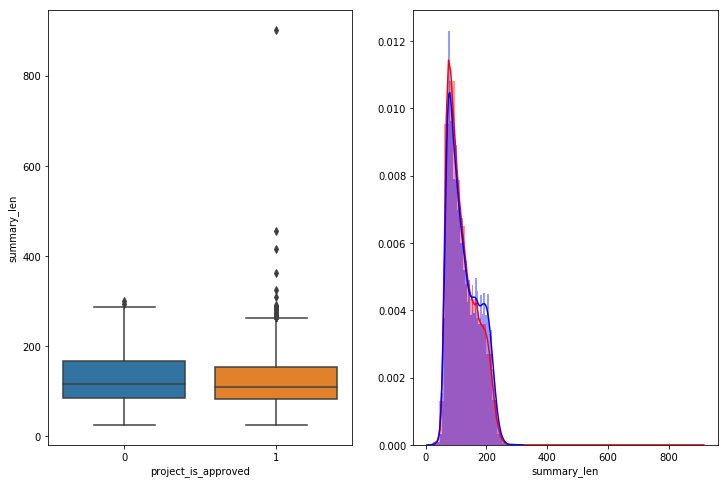

In [135]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "summary_len", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["summary_len"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["summary_len"][0:] , label = "0" , color = 'blue' )
plt.show()

In [136]:
df['essaytext'] = df.apply(lambda row: ' '.join([str(row['project_essay_1']), 
                                            str(row['project_essay_2']),]), axis=1)

In [137]:
import string

In [225]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [138]:
df['char_count'] = df['essaytext'].apply(len)
df['word_count'] = df['essaytext'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)
df['punctuation_count'] = df['essaytext'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
df['title_word_count'] = df['essaytext'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
df['upper_case_word_count'] = df['essaytext'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
df['stopword_count'] = df['essaytext'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop]))

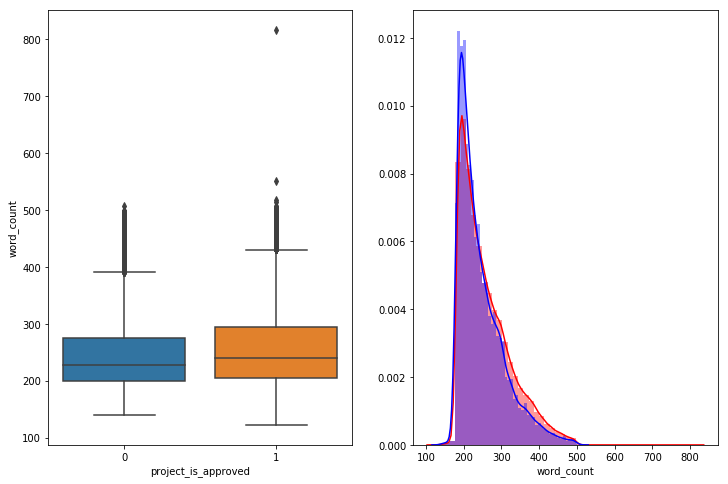

In [139]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "word_count", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["word_count"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["word_count"][0:] , label = "0" , color = 'blue' )
plt.show()

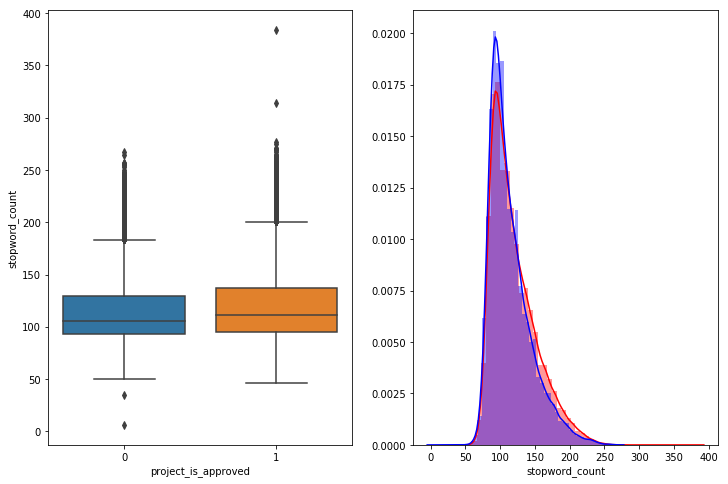

In [140]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "stopword_count", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["stopword_count"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["stopword_count"][0:] , label = "0" , color = 'blue' )
plt.show()

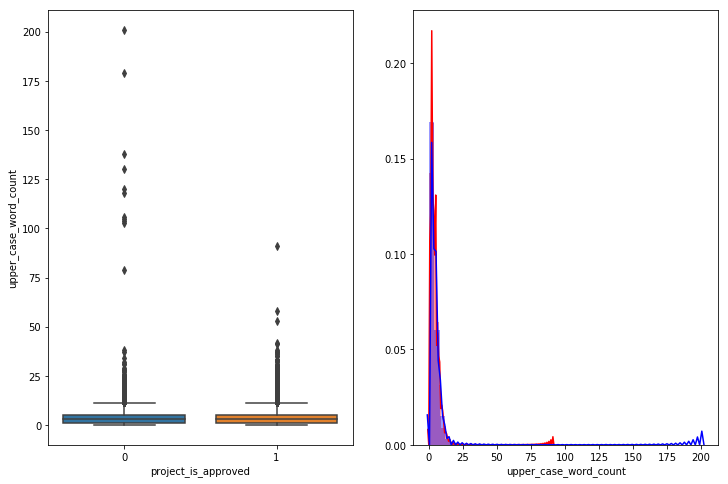

In [141]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "upper_case_word_count", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["upper_case_word_count"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["upper_case_word_count"][0:] , label = "0" , color = 'blue' )
plt.show()

In [142]:
##The distributions are not very different,still we keep the features

In [143]:
# No of spelling mistakes might be an important feature.But that takes a lot of time

In [144]:
##Words may be common here between project 1 and project2.Can we use fuzzy features?


In [145]:
#Textblob might give us interesting features on the using semantic analysis on essays 

In [146]:
def getpolarity(s):
    sent = TextBlob(s).sentiment
    return sent.polarity
def  getsubjectivity(s):
    sent = TextBlob(s).sentiment
    return sent.subjectivity

In [147]:
textColumns = ['project_essay_1', 'project_essay_2', 'project_resource_summary', 'resource_description', 'project_title']

for col in textColumns:
    df[col+'_polarity'] = df[col].apply(lambda x: getpolarity(x))
    df[col+'_subjectivity'] = df[col].apply(lambda x: getsubjectivity(x))
    

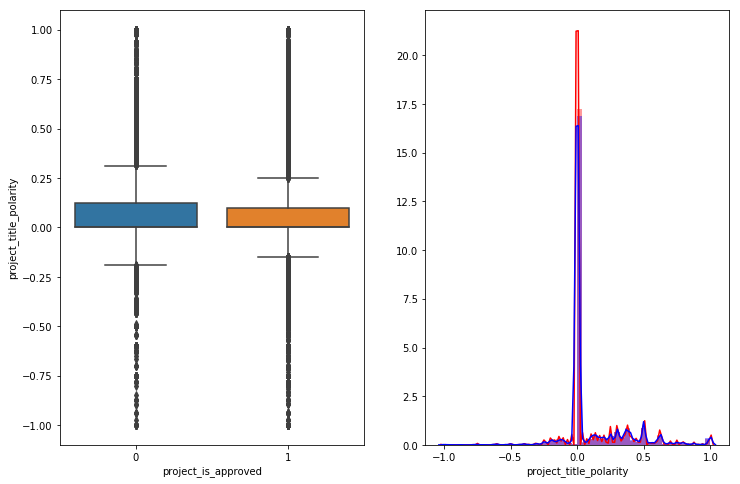

In [148]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "project_title_polarity", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["project_title_polarity"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["project_title_polarity"][0:] , label = "0" , color = 'blue' )
plt.show()

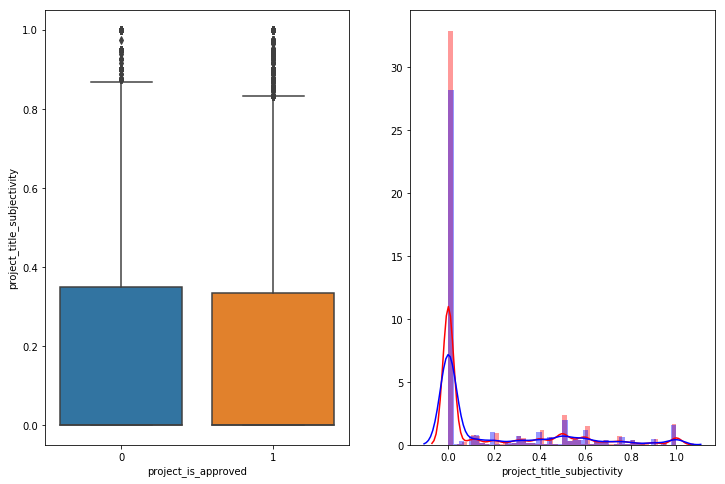

In [149]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "project_title_subjectivity", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["project_title_subjectivity"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["project_title_subjectivity"][0:] , label = "0" , color = 'blue' )
plt.show()

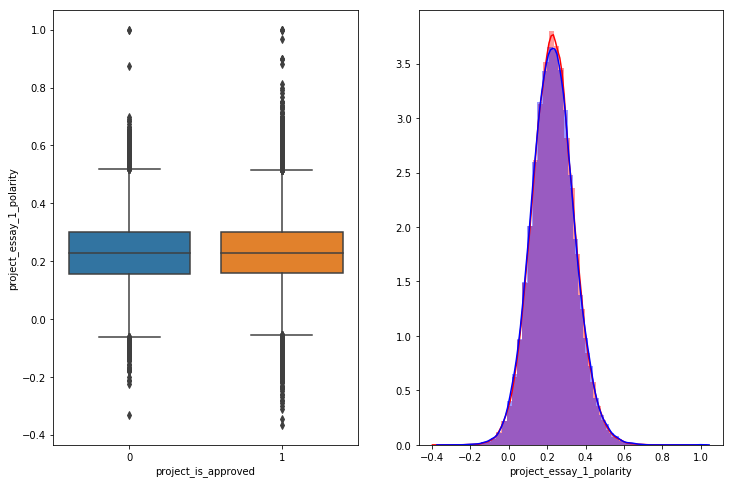

In [150]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "project_essay_1_polarity", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["project_essay_1_polarity"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["project_essay_1_polarity"][0:] , label = "0" , color = 'blue' )
plt.show()

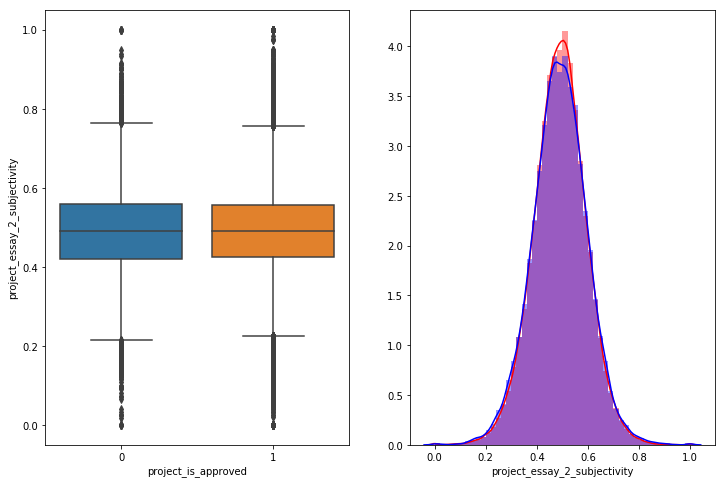

In [151]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "project_essay_2_subjectivity", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["project_essay_2_subjectivity"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["project_essay_2_subjectivity"][0:] , label = "0" , color = 'blue' )
plt.show()

In [152]:
#for i, col1 in enumerate(df['project_essay_1']):
#    for col2 in textColumns['project_essay_1':]:
 #       df['%s_%s_common' % (col1, col2)] = T.apply(lambda x:len(set(re.split('\W', row[col1].lower())).intersection(re.split('\W', row[col2].lower()))), axis=1)
        

In [153]:
df['commonwords'] = df.apply(lambda x:len(set(str(x['text0'].split())).intersection(str(x["text1"].split()))), axis=1)
        

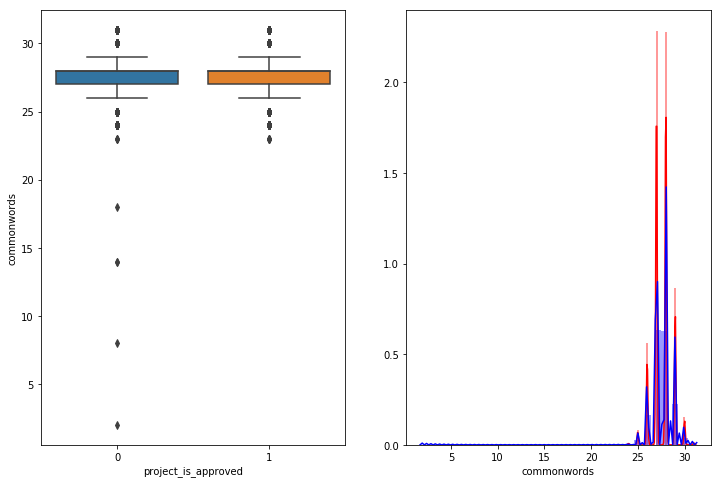

In [154]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.boxplot(x = 'project_is_approved', y = "commonwords", data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['project_is_approved'] == 1.0]["commonwords"][0:] , label = "1", color = 'red')
sns.distplot(df[df['project_is_approved'] == 0.0]["commonwords"][0:] , label = "0" , color = 'blue' )
plt.show()

In [ ]:
##there can be features of adverbs,nouns,etc but when tried it took a lot of time
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
#def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
#    except:
        pass
 #   return cnt


In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
#I dont know much about this method, but was trying .As it was taking a lot of time
cvectorizer = CountVectorizer(min_df=4, max_features=4000, ngram_range=(1,2))
cvz = cvectorizer.fit_transform(Xtrain['essaytext'])

# generate topic models using Latent Dirichlet Allocation
lda_model = LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20, random_state=42)
X_topics = lda_model.fit_transform(cvz)

In [155]:
df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'Year', 'Month', 'Weekday', 'Hour', 'Month_Day', 'Year_Day', 'items',
       'quantity', 'price', 'total_price', 'min_quantity', 'min_price',
       'min_total_price', 'max_quantity', 'max_price', 'max_total_price',
       'mean_quantity', 'mean_price', 'mean_total_price',
       'resource_description', 'text0', 'text1', 'text2', 'text3', 'text4',
       'essay1_len', 'essay2_len', 'title_len', 'resouce_len', 'summary_len',
       'essaytext', 'char_count', 'word_count', 'word_density',
       'punctuation_count', 'title_word_count', 'upper_case_word_count',
       'stopword_count', 'project_essay_1_polarity',
      

In [156]:
Df=df.drop(['id','teacher_id', 'teacher_prefix', 'school_state','project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_resource_summary','project_is_approved','resource_description','essaytext', 'text0',
       'text1', 'text2', 'text3', 'text4'],axis=1)

In [157]:
Df.columns

Index(['teacher_number_of_previously_posted_projects', 'Year', 'Month',
       'Weekday', 'Hour', 'Month_Day', 'Year_Day', 'items', 'quantity',
       'price', 'total_price', 'min_quantity', 'min_price', 'min_total_price',
       'max_quantity', 'max_price', 'max_total_price', 'mean_quantity',
       'mean_price', 'mean_total_price', 'essay1_len', 'essay2_len',
       'title_len', 'resouce_len', 'summary_len', 'char_count', 'word_count',
       'word_density', 'punctuation_count', 'title_word_count',
       'upper_case_word_count', 'stopword_count', 'project_essay_1_polarity',
       'project_essay_1_subjectivity', 'project_essay_2_polarity',
       'project_essay_2_subjectivity', 'project_resource_summary_polarity',
       'project_resource_summary_subjectivity',
       'resource_description_polarity', 'resource_description_subjectivity',
       'project_title_polarity', 'project_title_subjectivity', 'commonwords'],
      dtype='object')

In [636]:
Df.head()

,teacher_number_of_previously_posted_projects,items,quantity,price,total_price,min_quantity,min_price,min_total_price,max_quantity,max_price,...,project_essay_1_subjectivity,project_essay_2_polarity,project_essay_2_subjectivity,project_resource_summary_polarity,project_resource_summary_subjectivity,resource_description_polarity,resource_description_subjectivity,project_title_polarity,project_title_subjectivity,commonwords
128730,30,1,4,149.00,596.00,4,149.00,596.00,4,149.00,...,0.485195,0.131503,0.350726,0.000000,0.000000,0.433333,0.833333,0.0,0.00,28
173035,1,10,10,287.86,287.86,1,9.99,9.99,1,49.99,...,0.480839,0.185539,0.485948,0.000000,0.000000,-0.075000,0.212500,0.0,0.00,27
7344,8,7,20,193.93,526.80,1,8.99,19.99,6,49.99,...,0.472509,0.097898,0.469697,0.044444,0.333333,0.100000,0.700000,-0.1,0.45,27
180523,0,2,4,256.40,512.80,2,12.45,24.90,2,243.95,...,0.522470,0.210938,0.510938,0.000000,0.000000,0.095238,0.435714,0.0,0.00,27
8393,53,4,4,725.05,725.05,1,59.99,59.99,1,377.06,...,0.600000,0.270549,0.472857,0.200000,0.900000,0.100000,0.400000,0.4,0.50,29


In [158]:
Dftrain=Df.iloc[0:116532,:]
Dfcv=Df.iloc[116532:145664,:]
Dftest=Df.iloc[145664:,:]

In [159]:
Dftrain=np.array(Dftrain)
Dfcv=np.array(Dfcv)
Dftest=np.array(Dftest)


In [160]:
type(Df)

pandas.core.frame.DataFrame

In [161]:
##stacking all the features leaving id and teacher id

In [162]:

FullXcv=hstack((Xtextcv,Dfcv,catcv))
FullXtest=hstack((Xtexttest,Dftest,cattest))
FullXctrain=hstack((Xtexttrain,Dftrain,cattrain))

In [163]:
Dftrain.shape

(116532, 43)

In [164]:
cattrain.shape

(116532, 100)

In [165]:
Xtrain.shape

(116532, 39)

In [166]:
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(FullXctrain, y_train)
    predict_y = clf.predict_proba(FullXcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.7110774905809553
For values of alpha =  0.0001 The AUC is: 0.7429487547794484
For values of alpha =  0.001 The AUC is: 0.7613675304170735
For values of alpha =  0.01 The AUC is: 0.754529137309362
For values of alpha =  0.1 The AUC is: 0.7539815480191803
For values of alpha =  1 The AUC is: 0.7528473079464322


In [167]:
clf =LogisticRegression(C=0.001, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(FullXctrain, y_train)

predict_y = clf.predict_proba(FullXctrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(FullXcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(FullXtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.8142292049169235
For values of best alpha =  The cv AUC is: 0.7613675304170735
For values of best alpha =  The test AUC is: 0.7746084230136783


In [ ]:
##only 1% improvement

In [168]:
Df.columns

Index(['teacher_number_of_previously_posted_projects', 'Year', 'Month',
       'Weekday', 'Hour', 'Month_Day', 'Year_Day', 'items', 'quantity',
       'price', 'total_price', 'min_quantity', 'min_price', 'min_total_price',
       'max_quantity', 'max_price', 'max_total_price', 'mean_quantity',
       'mean_price', 'mean_total_price', 'essay1_len', 'essay2_len',
       'title_len', 'resouce_len', 'summary_len', 'char_count', 'word_count',
       'word_density', 'punctuation_count', 'title_word_count',
       'upper_case_word_count', 'stopword_count', 'project_essay_1_polarity',
       'project_essay_1_subjectivity', 'project_essay_2_polarity',
       'project_essay_2_subjectivity', 'project_resource_summary_polarity',
       'project_resource_summary_subjectivity',
       'resource_description_polarity', 'resource_description_subjectivity',
       'project_title_polarity', 'project_title_subjectivity', 'commonwords'],
      dtype='object')

In [ ]:
## lets see without date  and time features

In [169]:
DF=Df.drop(['Year', 'Month',
       'Weekday', 'Hour', 'Month_Day', 'Year_Day',],axis=1)

In [172]:
DFtrain=DF.iloc[0:116532,:]
DFcv=DF.iloc[116532:145664,:]
DFtest=DF.iloc[145664:,:]

In [173]:
FulXcv=hstack((Xtextcv,DFcv,catcv))
FulXtest=hstack((Xtexttest,DFtest,cattest))
FulXtrain=hstack((Xtexttrain,DFtrain,cattrain))

In [174]:
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = LogisticRegression(C=i, penalty='l2', random_state=42,class_weight='balanced')
    clf.fit(FulXtrain, y_train)
    predict_y = clf.predict_proba(FulXcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.7120329335192436
For values of alpha =  0.0001 The AUC is: 0.7447561985984947
For values of alpha =  0.001 The AUC is: 0.7638899296869829
For values of alpha =  0.01 The AUC is: 0.7516612545813245
For values of alpha =  0.1 The AUC is: 0.7537328053680241
For values of alpha =  1 The AUC is: 0.7554163148995722


In [176]:
clf =LogisticRegression(C=0.001, penalty='l2', random_state=42,class_weight='balanced')
clf.fit(FulXtrain, y_train)

predict_y = clf.predict_proba(FulXtrain)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_train,predict_y )
print('For values of best alpha = ',"The train AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(FulXcv)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
print('For values of best alpha = ', "The cv AUC is:",metrics.auc(fpr, tpr))

predict_y = clf.predict_proba(FulXtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
print('For values of best alpha = ', "The test AUC is:",metrics.auc(fpr, tpr))


For values of best alpha =  The train AUC is: 0.8139170213000106
For values of best alpha =  The cv AUC is: 0.7638899296869829
For values of best alpha =  The test AUC is: 0.7749322984608626


In [224]:
##This means we can leave out date time features!!!

In [214]:
##When I applied SGD with loss=log ,the results were poor again.Why?with logistic they are good!
#Same with SVM here

In [194]:
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i,loss='hinge', penalty='l2', random_state=42)
    clf.fit(FulXtrain, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(FulXtrain, y_train)
    predict_y = sig_clf.predict_proba(FulXcv)[:,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))

For values of alpha =  1e-05 The AUC is: 0.5
For values of alpha =  0.0001 The AUC is: 0.635209292097761
For values of alpha =  0.001 The AUC is: 0.6716486336985339
For values of alpha =  0.01 The AUC is: 0.6807237682751843
For values of alpha =  0.1 The AUC is: 0.6754028102286646
For values of alpha =  1 The AUC is: 0.6895299496174733


In [222]:
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
alpha = [10 ** j for j in range(-5, 1)] # hyperparam for SGD classifier.

cv_auc_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2',loss='log', random_state=42,class_weight='balanced')
    clf.fit(FulXtrain, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(FulXtrain, y_train)
    predict_y = sig_clf.predict_proba(FulXcv)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
    cv_auc_array.append(metrics.auc(fpr, tpr))
    print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))


For values of alpha =  1e-05 The AUC is: 0.5
For values of alpha =  0.0001 The AUC is: 0.5
For values of alpha =  0.001 The AUC is: 0.6391669826937582
For values of alpha =  0.01 The AUC is: 0.6454411110805509
For values of alpha =  0.1 The AUC is: 0.628057018241076
For values of alpha =  1 The AUC is: 0.648821231574086


In [223]:
#now we can apply other complex models like RF,Xgboost

In [199]:
#RF
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
        clf.fit(FulXtrain, y_train)
        predict_y = clf.predict_proba(FulXcv)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
        cv_auc_array.append(metrics.auc(fpr, tpr))
        print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))



for n_estimators = 10 and max depth =  2
For values of alpha =  10 The AUC is: 0.6239956039407859
for n_estimators = 10 and max depth =  3
For values of alpha =  10 The AUC is: 0.6550389432007442
for n_estimators = 10 and max depth =  5
For values of alpha =  10 The AUC is: 0.6629659884534927
for n_estimators = 10 and max depth =  10
For values of alpha =  10 The AUC is: 0.6870039812032447
for n_estimators = 50 and max depth =  2
For values of alpha =  50 The AUC is: 0.6724608932498943
for n_estimators = 50 and max depth =  3
For values of alpha =  50 The AUC is: 0.6860828554661847
for n_estimators = 50 and max depth =  5
For values of alpha =  50 The AUC is: 0.6911379292568597
for n_estimators = 50 and max depth =  10
For values of alpha =  50 The AUC is: 0.7052218407235891
for n_estimators = 100 and max depth =  2
For values of alpha =  100 The AUC is: 0.6896927317342945
for n_estimators = 100 and max depth =  3
For values of alpha =  100 The AUC is: 0.6963978330836196
for n_estimato

In [ ]:
## Rf is not a good performer

In [211]:
##Scikit learn implementation XGBOOST

alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,6]
cv_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = xgb.XGBClassifier(objective = 'binary:logistic',n_estimators=i, 
                                 max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(FulXtrain, y_train)
        predict_y = clf.predict_proba(FulXcv)[:,1]
        fpr, tpr, thresholds = metrics.roc_curve(y_cv,predict_y )
        cv_auc_array.append(metrics.auc(fpr, tpr))
        print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))

for n_estimators = 10 and max depth =  2
For values of alpha =  10 The AUC is: 0.6795770629052024
for n_estimators = 10 and max depth =  3
For values of alpha =  10 The AUC is: 0.6925471002737063
for n_estimators = 10 and max depth =  5
For values of alpha =  10 The AUC is: 0.7083593905148519
for n_estimators = 10 and max depth =  6
For values of alpha =  10 The AUC is: 0.7128948940122443
for n_estimators = 50 and max depth =  2
For values of alpha =  50 The AUC is: 0.7113738072550962
for n_estimators = 50 and max depth =  3
For values of alpha =  50 The AUC is: 0.7222345677386492
for n_estimators = 50 and max depth =  5
For values of alpha =  50 The AUC is: 0.7385821422200385
for n_estimators = 50 and max depth =  6
For values of alpha =  50 The AUC is: 0.7443824436325766
for n_estimators = 100 and max depth =  2
For values of alpha =  100 The AUC is: 0.7275932421714632
for n_estimators = 100 and max depth =  3
For values of alpha =  100 The AUC is: 0.7406116305195385
for n_estimators

In [212]:
clf = xgb.XGBClassifier(objective = 'binary:logistic',n_estimators=500, 
                                 max_depth=6, random_state=42, n_jobs=-1)
clf.fit(FulXtrain, y_train)
predict_y = clf.predict_proba(FulXtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,predict_y )
cv_auc_array.append(metrics.auc(fpr, tpr))
print('For values of alpha = ', i, "The AUC is:",metrics.auc(fpr, tpr))

For values of alpha =  1000 The AUC is: 0.7842252522662942


In [ ]:
##By Xgboost we are achieving the best

In [ ]:
##Not doing random/grid search  because that will take a lot of time
#just took random nos from kaggle and it achieved more better!

In [201]:
params_xgb = {
        'eta': 0.05,
        'max_depth': 4,
        'subsample': 0.85,
        'colsample_bytree': 0.25,
        'min_child_weight': 3,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'seed': 0,
        'silent': 1,
    }
dtrain = xgb.DMatrix(FulXtrain, label=y_train)
dval   = xgb.DMatrix(FulXtest, label=y_test)
watchlist = [(dtrain, 'train'), (dval, 'valid')]
model = xgb.train(params_xgb, dtrain, 5000,  watchlist, maximize=True, verbose_eval=200, early_stopping_rounds=200)
Yvl1 = model.predict(dval)
Yts1 = model.predict(xgb.DMatrix(FulXtest)) 
#what is the difference between last two lines?

[0]	train-auc:0.686781	valid-auc:0.680834
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[200]	train-auc:0.784919	valid-auc:0.763155
[400]	train-auc:0.810338	valid-auc:0.77502
[600]	train-auc:0.826472	valid-auc:0.780642
[800]	train-auc:0.838951	valid-auc:0.783502
[1000]	train-auc:0.849414	valid-auc:0.785137
[1200]	train-auc:0.858344	valid-auc:0.786512
[1400]	train-auc:0.865905	valid-auc:0.787128
[1600]	train-auc:0.873091	valid-auc:0.787784
[1800]	train-auc:0.879678	valid-auc:0.788044
[2000]	train-auc:0.885739	valid-auc:0.788116
[2200]	train-auc:0.891097	valid-auc:0.788372
[2400]	train-auc:0.896224	valid-auc:0.788668
[2600]	train-auc:0.901176	valid-auc:0.78881
[2800]	train-auc:0.905399	valid-auc:0.788803
Stopping. Best iteration:
[2722]	train-auc:0.903904	valid-auc:0.788951



In [213]:
params_xgb = {
        'eta': 0.01,
        'max_depth': 4,
        
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        
    }
dtrain = xgb.DMatrix(FulXtrain, label=y_train)
dval   = xgb.DMatrix(FulXtest, label=y_test)
watchlist = [(dtrain, 'train'), (dval, 'valid')]
model = xgb.train(params_xgb, dtrain, 5000,  watchlist, maximize=True, verbose_eval=200, early_stopping_rounds=200)
Yvl1 = model.predict(dval)
Yts1 = model.predict(xgb.DMatrix(FulXtest))

[19:21:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-auc:0.705209	valid-auc:0.698681
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 200 rounds.
[19:21:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:21:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:22:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:22:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:22:03] C:\Users\Administrator\Desktop\xgboost\src\tree\

[19:23:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:23:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:24:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:24:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:25:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:25:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:26:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:26:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:27:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:27:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:29:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:29:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:30:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:30:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:30:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:30:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:30:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:30:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:30:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:31:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:31:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:31:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:31:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:31:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:31:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:31:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:32:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:32:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:32:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:32:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:32:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:32:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:32:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:33:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:33:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:33:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:33:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:33:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:33:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:34:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:35:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:35:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:35:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:35:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:35:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:35:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:35:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:36:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:36:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:36:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:36:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:36:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:36:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:37:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:37:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:37:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:37:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:37:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:37:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:37:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:38:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:38:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:38:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:38:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:38:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:38:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:38:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:39:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:39:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:39:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:40:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:40:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:40:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:40:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:41:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:41:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:41:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:41:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:41:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:41:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:41:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:42:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:42:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:42:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:42:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:42:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:42:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:42:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:43:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:43:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:43:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:43:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:43:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:43:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:43:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:44:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:44:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:44:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:44:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:44:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:44:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:44:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:45:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:45:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:45:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:45:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:45:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:45:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:45:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:46:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:46:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:46:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:46:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:46:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:47:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:47:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:48:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:48:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:48:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:48:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:48:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:48:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:48:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:49:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:49:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:49:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:49:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:49:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:49:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:49:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:50:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:50:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:50:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:50:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:50:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:50:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:50:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:51:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:51:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:51:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:51:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:51:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:51:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:51:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:52:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:52:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:52:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:52:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:52:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:52:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:52:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:53:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:53:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:53:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:54:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:54:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:54:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:54:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:55:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:55:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:55:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:55:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:55:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:55:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:55:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:56:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:56:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:56:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:56:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:56:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:56:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:56:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:57:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:57:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:57:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:57:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:57:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:57:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:57:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:58:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[19:58:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[19:58:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:58:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:58:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:58:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:58:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[19:59:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[19:59:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[19:59:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[19:59:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[19:59:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:00:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:00:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:01:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:01:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:01:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:01:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:01:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:01:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:01:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:02:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:02:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:02:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:02:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:02:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:02:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:02:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:03:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:03:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:03:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:03:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:03:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:03:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:03:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:04:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:04:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:04:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:04:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:04:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:04:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:04:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:05:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:05:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:05:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:05:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:05:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:05:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:05:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:07:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:07:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:07:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:07:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:07:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:07:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:07:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:08:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:08:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:08:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:08:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:08:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:08:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:08:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:09:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:09:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:09:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:09:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:09:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:09:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:09:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:10:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:10:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:10:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:10:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:10:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:10:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:10:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:11:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:11:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:11:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:11:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:11:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:11:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:11:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:13:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:13:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:13:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:13:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:13:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:13:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:13:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:14:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:14:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:14:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:14:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:14:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:14:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:14:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:15:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:15:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:15:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:15:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:15:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:15:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:15:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:16:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:16:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:16:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:16:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:16:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:16:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:16:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:17:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:17:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:17:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:17:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:17:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:17:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:17:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:19:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:19:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:19:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:19:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:19:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:19:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:19:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:20:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:20:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:20:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:20:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:20:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:20:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:20:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:21:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:21:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:21:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:21:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:21:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:21:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:21:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:22:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:22:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:22:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:22:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:22:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:22:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:22:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:23:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:23:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:23:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:23:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:23:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:23:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:23:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:24:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:24:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:24:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:24:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:24:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:24:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:24:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:25:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:25:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:25:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:25:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:25:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:25:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:25:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:26:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:26:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:26:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:26:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:26:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:26:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:26:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:27:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:27:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:27:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:27:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:27:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:27:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:27:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:28:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:28:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:28:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:28:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:28:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:28:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:28:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:29:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:29:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:29:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:29:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:29:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:29:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:30:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:30:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:30:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:30:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:31:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:31:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:31:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:31:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:32:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:32:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:32:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:32:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:32:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:32:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:32:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:33:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:33:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:33:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:33:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:33:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:33:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:33:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:34:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:34:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:34:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:34:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:34:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:34:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:34:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:35:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:35:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:35:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:35:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:35:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:35:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:35:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:36:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:36:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:36:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:36:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:36:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:36:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:36:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:37:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:37:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:37:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:37:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:37:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:37:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:37:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:38:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:38:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:38:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:38:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:38:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:38:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:38:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:39:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:39:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:39:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:39:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:39:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:39:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:39:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:40:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:40:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:40:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:40:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:40:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:40:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:40:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:41:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:41:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:41:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:41:57] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:41:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:41:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:42:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:43:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:43:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:43:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:43:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:43:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:43:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:43:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:44:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:44:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:44:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:44:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:44:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:44:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:44:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:45:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:45:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:45:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:45:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:45:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:45:46] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:45:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:46:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:46:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:47:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:47:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:47:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:47:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[4000]	train-auc:0.850605	valid-auc:0.781841
[20:47:06] C:\Users\Administrator\Desktop\xgboost

[20:48:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:48:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:48:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[20:48:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:48:17] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:48:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:48:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:49:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:49:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:49:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:49:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:49:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:49:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:49:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:50:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:50:43] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:50:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:50:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:50:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:50:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:50:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:51:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:52:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:52:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:52:04] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:52:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:52:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:52:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:53:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:53:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:53:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:53:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:53:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:53:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:53:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:54:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:54:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[20:54:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:54:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:54:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:54:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:54:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:55:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:55:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:55:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:55:49] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:55:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:55:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[20:55:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:57:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:57:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:57:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:57:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:57:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:57:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[20:57:09] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:58:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:58:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[20:58:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[20:58:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:58:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:58:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[20:58:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:59:53] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[20:59:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[20:59:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:59:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:00:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[21:00:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:00:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:01:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:01:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:01:22] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:01:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[4600]	train-auc:0.85785	valid-auc:0.782752
[21:01:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:01:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[21:01:27] C:\Users\Administrator\Desktop\xgboost\

[21:02:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[21:02:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:02:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[21:02:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:02:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:02:37] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:02:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:03:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:03:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21:03:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:03:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:03:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:03:51] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:03:52] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:04:54] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:04:55] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[21:04:56] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:04:58] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:04:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:05:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:05:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:06:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[21:06:08] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[21:06:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:06:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:06:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21:06:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21:06:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:07:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:07:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21:07:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:07:24] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[21:07:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[21:07:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:07:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:08:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[21:08:29] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[21:08:30] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:08:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:08:33] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:08:34] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[21:08:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[21:09:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[21:09:42] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[21:09:44] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[21:09:45] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[21:09:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[21:09:48] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[21:09:50] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [ ]:
##from this 0.7832

In [ ]:
#What is topic modelling?
#https://www.kaggle.com/shivamb/extensive-text-data-feature-engineering
How is that useful    

In [ ]:
###furthur work:
1.Fuzzy features might be useful(essays might mean the same)
2.Spelling mistakes for both preprocessing and feature extraction
3.Random/grid search for xgboost
4.Can the fluency be captured?
5.Stemming can prove to be useful
